# Lectura de ficheros easyMoney

## import Librariesz

In [1]:
import numpy as np 
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import widgets
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file




/Users/claudiacastro/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# ca_df = pd.read_parquet('https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/commercial_activity_df.parquet')

# prod_df = pd.read_parquet('https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/products_df.parquet')

# sdg_df = pd.read_parquet('https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/sociodemographic_df.parquet')

In [3]:
# carga del dataset completo
df_full = pd.read_parquet("/Users/claudiacastro/easy_money_project/df_completo.parquet")
# eliminamos columnas que no aportan información
df_full = df_full.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1)
# eliminamos duplicados a partir de la columna pk_cid y nos quedamos con el primero
#df_full = df_full.drop_duplicates(subset=['pk_cid', "entry_date"], keep="first")


# df_1 = pd.merge(ca_df,prod_df, how="inner" ,on=['pk_cid','pk_partition'])

# df_2 = pd.merge(df_1,sdg_df, how="inner",on=['pk_cid','pk_partition'])

# df_2.to_parquet("/Users/claudiacastro/easy_money_project/df_completo.parquet")


# modificamos el tipo de dato de las columnas, SIMPLEMENTE CAMBIA EL TIPO DE DATO
df_full["pk_partition"] = pd.to_datetime(df_full["pk_partition"])
df_full["entry_date"] = pd.to_datetime(df_full["entry_date"], errors='coerce')
df_full["entry_channel"] = df_full["entry_channel"].astype('category')
df_full['active_customer'] = df_full['active_customer'].astype('int32')
df_full['segment'] = df_full['segment'].astype('category')
df_full['short_term_deposit'] = df_full['short_term_deposit'].astype('int32')
df_full['loans'] = df_full['loans'].astype('int32')
df_full['mortgage'] = df_full['mortgage'].astype('int32')
df_full['funds'] = df_full['funds'].astype('int32')
df_full['securities'] = df_full['securities'].astype('int32')
df_full['long_term_deposit'] = df_full['long_term_deposit'].astype('int32')
df_full['credit_card'] = df_full['credit_card'].astype('int32')
# df_full['payroll'] = df_full['payroll'].astype('int32')
# df_full['pension_plan'] = df_full['pension_plan'].astype('int32')
df_full['payroll_account'] = df_full['payroll_account'].astype('int32')
df_full['emc_account'] = df_full['emc_account'].astype('int32')
df_full['debit_card'] = df_full['debit_card'].astype('int32')
df_full['em_account_p'] = df_full['em_account_p'].astype('int32')
df_full['em_acount'] = df_full['em_acount'].astype('int32')
df_full["country_id"] = df_full["country_id"].astype('category')
df_full["region_code"] = df_full["region_code"].astype('category')
df_full["gender"] =  df_full["gender"].astype('category')
df_full["age"] = df_full["age"].astype('int32')
df_full["deceased"] = df_full["deceased"].astype('category')
# reporte del dataset
# profile = ProfileReport(df_full, title="Profiling Report Easy Money")
# profile.to_file("profiling_report_easyMoney.html")

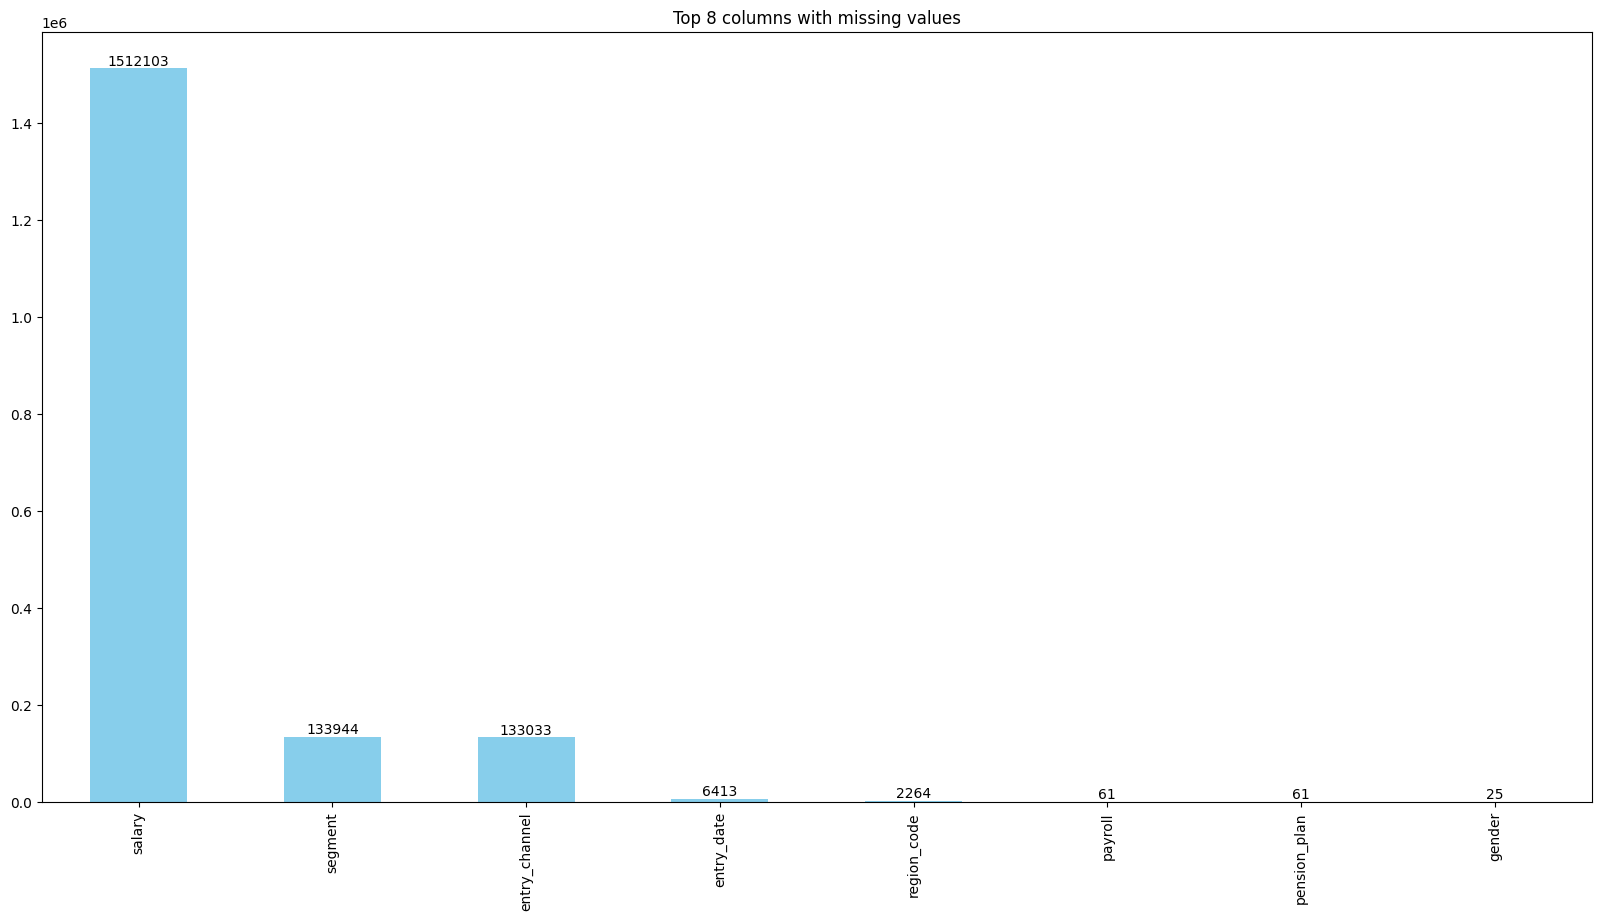

In [4]:
# valores nulos en el dataset

df_full.isna().sum().sort_values(ascending=False).head(8).plot(kind='bar', figsize=(20, 10), color='skyblue')
for i in range(8):
    plt.text(i, df_full.isna().sum().sort_values(ascending=False)[i], df_full.isna().sum().sort_values(ascending=False)[i], ha = 'center', va = 'bottom')
plt.title('Top 8 columns with missing values')
plt.show()



ANÁLISIS DE CADA VARIABLE TENIENDO EN CUENTA EL TOTAL DE CLIENTES

TOTAL DE CLIENTES 

In [5]:
df_full["pk_cid"].nunique()

456373

TOTAL DE CLIENTES POR GENDER

In [6]:
# se crea una categoria Unknown para los valores nulos
df_full["gender"] = df_full["gender"].cat.add_categories(["Unknown"]).fillna("Unknown")

df_full.groupby("gender")["pk_cid"].nunique().apply(lambda x: x/df_full["pk_cid"].nunique()*100)

gender
H         51.244
V         48.765
Unknown    0.000
Name: pk_cid, dtype: float64

In [7]:
df_full.groupby("gender")["pk_cid"].nunique()

gender
H          233862
V          222550
Unknown         2
Name: pk_cid, dtype: int64

In [8]:
df_full.groupby("gender")["pk_cid"].nunique().sum()
# se observa que hay 41 valores más que la cantidad de clientes únicos
# lo que representa que hay clientes con más de un género asignado

456414

ANALISIS DE LOS CLIENTES CON MAS DE UN GENERO Y LOS QUE SON SOLO DE UN TIPO

In [9]:

# Contar cuántos valores únicos tiene cada cliente en la columna gender
estado_por_cliente_gender = df_full.groupby('pk_cid')['gender'].agg(['nunique', 'count'])

# Identificar clientes con géneros mixtos (H y F o Unknown)
clientes_mixtos_gender = estado_por_cliente_gender[estado_por_cliente_gender['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_gender = df_full[~df_full['pk_cid'].isin(clientes_mixtos_gender)]

# Identificar clientes que son siempre 'H'
clientes_siempre_H = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == 'H']['pk_cid'].unique()

# Identificar clientes que son siempre 'V'
clientes_siempre_V = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == 'V']['pk_cid'].unique()

# Identificar clientes "Unknown" en gender (excluyendo clientes mixtos)
clientes_siempre_Unknown = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == "Unknown"]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_siempre_H = len(clientes_siempre_H)
n_siempre_V = len(clientes_siempre_V)
n_siempre_Unknown = len(clientes_siempre_Unknown)
n_mixtos_gender = len(clientes_mixtos_gender)

# Mostrar los resultados
print(f"Clientes que son siempre 'H' en 'gender' (excluyendo mixtos): {n_siempre_H}")
print(f"Clientes que son siempre 'V' en 'gender' (excluyendo mixtos): {n_siempre_V}")
print(f"Clientes que son todo 'Unknown' (excluyendo mixtos): {n_siempre_Unknown}")
print(f"Clientes con géneros mixtos (H y V o Unknown): {n_mixtos_gender}")
print(f"Total de clientes en el dataset: {n_siempre_H + n_siempre_V + n_siempre_Unknown + n_mixtos_gender}")


Clientes que son siempre 'H' en 'gender' (excluyendo mixtos): 233821
Clientes que son siempre 'V' en 'gender' (excluyendo mixtos): 222509
Clientes que son todo 'Unknown' (excluyendo mixtos): 2
Clientes con géneros mixtos (H y V o Unknown): 41
Total de clientes en el dataset: 456373


In [10]:
# porcientos de lo anterior
n_total = n_siempre_H + n_siempre_V + n_siempre_Unknown + n_mixtos_gender
p_siempre_H = n_siempre_H / n_total * 100
p_siempre_V = n_siempre_V / n_total * 100
p_siempre_Unknown = n_siempre_Unknown / n_total * 100
p_mixtos_gender = n_mixtos_gender / n_total * 100

# Mostrar los resultados
print(f"Clientes que son siempre 'H': {p_siempre_H:.2f}%")
print(f"Clientes que son siempre 'V': {p_siempre_V:.2f}%")
print(f"Clientes que son todo 'Unknown': {p_siempre_Unknown:.5f}%")
print(f"Clientes con géneros mixtos (H y V o Unknown): {p_mixtos_gender:.3f}%")

Clientes que son siempre 'H': 51.23%
Clientes que son siempre 'V': 48.76%
Clientes que son todo 'Unknown': 0.00044%
Clientes con géneros mixtos (H y V o Unknown): 0.009%


CLIENTES ACTIVOS

In [11]:
# agrupando los clientes por activos y no activos
df_full.groupby("active_customer")["pk_cid"].nunique()

active_customer
0    317179
1    197731
Name: pk_cid, dtype: int64

In [12]:
df_full.groupby("active_customer")["pk_cid"].nunique().sum()
# se observa que la cantidad de clientes agrupados por activeCustomer
# es mayor que la cantidad de cliente existente (456373)
# lo que significa que hay clientes que presentan más de un estado

514910

Descomposición de los clientes según activeCustomer por clientes: siempre activos, nunca activos, con actividad variable y si presentan nulos.

In [13]:
# Contar cuántos estados diferentes tiene cada cliente en active_customer
estado_por_cliente = df_full.groupby('pk_cid')['active_customer'].agg(['nunique', 'count'])

# Identificar clientes con estados mixtos (0 y 1)
clientes_mixtos = estado_por_cliente[estado_por_cliente['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos = df_full[~df_full['pk_cid'].isin(clientes_mixtos)]

# Identificar clientes que son siempre 0
clientes_siempre_cero = df_no_mixtos.groupby('pk_cid')['active_customer'].min()
clientes_siempre_cero = clientes_siempre_cero[clientes_siempre_cero == 0].index

# Identificar clientes que son siempre 1
clientes_siempre_uno = df_no_mixtos.groupby('pk_cid')['active_customer'].max()
clientes_siempre_uno = clientes_siempre_uno[clientes_siempre_uno == 1].index

# Identificar clientes con valores NaN (excluyendo clientes mixtos)
clientes_con_nan = df_no_mixtos[df_no_mixtos['active_customer'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_siempre_cero = len(clientes_siempre_cero)
n_siempre_uno = len(clientes_siempre_uno)
n_con_nan = len(clientes_con_nan)
n_mixtos = len(clientes_mixtos)

# Mostrar los resultados
print(f"Clientes que son siempre 0 en 'active_customer' (excluyendo mixtos): {n_siempre_cero}")
print(f"Clientes que son siempre 1 en 'active_customer' (excluyendo mixtos): {n_siempre_uno}")
print(f"Clientes con valores NaN en 'active_customer' (excluyendo mixtos): {n_con_nan}")
print(f"Clientes con estados mixtos (0 y 1): {n_mixtos}")
print(f"Total de clientes en el dataset: {n_siempre_cero + n_siempre_uno + n_con_nan + n_mixtos}")


Clientes que son siempre 0 en 'active_customer' (excluyendo mixtos): 258642
Clientes que son siempre 1 en 'active_customer' (excluyendo mixtos): 139194
Clientes con valores NaN en 'active_customer' (excluyendo mixtos): 0
Clientes con estados mixtos (0 y 1): 58537
Total de clientes en el dataset: 456373


In [14]:
# porcientos de lo anterior
total_clientes = n_siempre_cero + n_siempre_uno + n_con_nan + n_mixtos
porc_siempre_cero = n_siempre_cero / total_clientes * 100
porc_siempre_uno = n_siempre_uno / total_clientes * 100
porc_con_nan = n_con_nan / total_clientes * 100
porc_mixtos = n_mixtos / total_clientes * 100

# Mostrar los resultados
print(f"Clientes que son siempre 0 en 'active_customer' (excluyendo mixtos): {porc_siempre_cero:.2f}%")
print(f"Clientes que son siempre 1 en 'active_customer' (excluyendo mixtos): {porc_siempre_uno:.2f}%")
print(f"Clientes con valores NaN en 'active_customer' (excluyendo mixtos): {porc_con_nan:.2f}%")
print(f"Clientes con estados mixtos (0 y 1): {porc_mixtos:.2f}%")
print(f"Total de clientes active_customer : {total_clientes}") 
print(f"Total de clientes en el dataset: {df_full['pk_cid'].nunique()}")



Clientes que son siempre 0 en 'active_customer' (excluyendo mixtos): 56.67%
Clientes que son siempre 1 en 'active_customer' (excluyendo mixtos): 30.50%
Clientes con valores NaN en 'active_customer' (excluyendo mixtos): 0.00%
Clientes con estados mixtos (0 y 1): 12.83%
Total de clientes active_customer : 456373
Total de clientes en el dataset: 456373


In [15]:
# grafico de barras con los porcentajes anteriores

#plt.figure(figsize=(10, 6))
#plt.bar(['Siempre 0', 'Siempre 1', 'NaN', 'Mixtos'], [porc_siempre_cero, porc_siempre_uno, porc_con_nan, porc_mixtos])
#plt.ylabel('Porcentaje de clientes')
#plt.title('Distribución de los clientes en active_customer')
#plt.show()


CLIENTES SEGUN ENTRY_CHANNEL

In [16]:
df_full["entry_channel"] = df_full["entry_channel"].cat.add_categories(["Unknown"]).fillna("Unknown")
df_full["entry_channel"].value_counts().head(20).apply(lambda x: x/df_full["entry_channel"].count()*100)

entry_channel
KHE       52.222
KFC       14.936
KHQ        9.899
KAT        6.978
KHK        3.860
KHM        2.961
Unknown    2.231
KHN        1.818
KFA        1.325
KHD        1.273
RED        1.016
KHL        0.700
KHF        0.346
KHO        0.138
KAZ        0.095
KHC        0.088
KBG        0.028
KEH        0.012
KHP        0.012
007        0.010
Name: count, dtype: float64

In [17]:
df_full["entry_channel"].value_counts().head(20)

entry_channel
KHE        3113947
KFC         890620
KHQ         590280
KAT         416084
KHK         230197
KHM         176591
Unknown     133033
KHN         108434
KFA          79020
KHD          75899
RED          60601
KHL          41736
KHF          20657
KHO           8247
KAZ           5635
KHC           5241
KBG           1662
KEH            728
KHP            691
007            613
Name: count, dtype: int64

In [18]:
df_full.groupby("entry_channel")["pk_cid"].nunique()

entry_channel
004             1
007            50
013            30
KAA            18
KAB             8
            ...  
KHP            86
KHQ         76372
KHS             5
RED          5279
Unknown    132201
Name: pk_cid, Length: 69, dtype: int64

In [19]:

# Contar cuántos valores únicos tiene cada cliente en la columna entry_channel
estado_por_cliente_channel = df_full.groupby('pk_cid')['entry_channel'].agg(['nunique', 'count'])

# Identificar clientes con canales de entrada mixtos (más de un valor en entry_channel)
clientes_mixtos_channel = estado_por_cliente_channel[estado_por_cliente_channel['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_channel = df_full[~df_full['pk_cid'].isin(clientes_mixtos_channel)]

# Identificar clientes que siempre usaron un solo canal de entrada (excluyendo mixtos)
clientes_un_canal = df_no_mixtos_channel.groupby('entry_channel')['pk_cid'].nunique()

# Identificar clientes con valores NaN en entry_channel (excluyendo clientes mixtos)
clientes_con_nan_channel = df_no_mixtos_channel[df_no_mixtos_channel['entry_channel'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_un_canal = clientes_un_canal.sum()
n_con_nan_channel = len(clientes_con_nan_channel)
n_mixtos_channel = len(clientes_mixtos_channel)

# Mostrar los resultados
print(f"Clientes que siempre usaron un solo canal de entrada (excluyendo mixtos): {n_un_canal}")
print(f"Clientes con valores NaN en 'entry_channel' (excluyendo mixtos): {n_con_nan_channel}")
print(f"Clientes con canales de entrada mixtos: {n_mixtos_channel}")

Clientes que siempre usaron un solo canal de entrada (excluyendo mixtos): 331869
Clientes con valores NaN en 'entry_channel' (excluyendo mixtos): 0
Clientes con canales de entrada mixtos: 124504


In [20]:
# Contar cuántos valores únicos tiene cada cliente en la columna entry_channel
estado_por_cliente_channel = df_full.groupby('pk_cid')['entry_channel'].agg(['nunique', 'count'])

# Identificar clientes con canales de entrada mixtos (más de un valor en entry_channel)
clientes_mixtos_channel = estado_por_cliente_channel[estado_por_cliente_channel['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_channel = df_full[~df_full['pk_cid'].isin(clientes_mixtos_channel)]

# Contar clientes únicos para cada canal de entrada
clientes_por_canal = df_no_mixtos_channel.groupby('entry_channel')['pk_cid'].nunique()

# Contar el número de clientes con valores NaN en entry_channel
clientes_con_nan_channel = df_no_mixtos_channel[df_no_mixtos_channel['entry_channel'].isna()]['pk_cid'].nunique()


# Mostrar los resultados
print(f"Clientes únicos por canal de entrada (excluyendo mixtos):")
print(clientes_por_canal.sort_values(ascending=False).head(10))
print(f"\nClientes con valores NaN en 'entry_channel' (excluyendo mixtos): {clientes_con_nan_channel}")
print(f"\nClientes con canales de entrada mixtos: {len(clientes_mixtos_channel)}")

Clientes únicos por canal de entrada (excluyendo mixtos):
entry_channel
KHE        196417
KFC         59149
KAT         26432
KHK         15825
Unknown      8921
KHD          4845
KFA          4758
KHM          3538
KHN          3238
RED          2927
Name: pk_cid, dtype: int64

Clientes con valores NaN en 'entry_channel' (excluyendo mixtos): 0

Clientes con canales de entrada mixtos: 124504


Existen muchos canales de captación de clientes siendo los principales KHE, KFC, KAT, KHK   



In [21]:
print(f" Porcentaje de clientes por canales de entrada unicos: {clientes_por_canal.sum()/df_full['pk_cid'].nunique()*100}")
print(f" Porcentaje de clientes por canales de entrada mixtos: {len(clientes_mixtos_channel)/df_full['pk_cid'].nunique()*100}")

 Porcentaje de clientes por canales de entrada unicos: 72.71880676551855
 Porcentaje de clientes por canales de entrada mixtos: 27.281193234481442


Del total de clientes de captados por canales únicos este es su porcentaje, manteniendose los canales principales y hay algunos canales que estan a cero, es decir, que no tienen ningun cliente por que se encuentran dentro de canales de entrada mixtos, que mas adelante se analiza. 

In [22]:
# porcentaje de clientes por canal de entrada unico
clientes_por_canal = clientes_por_canal.reset_index()
clientes_por_canal.rename(columns={"entry_channel": "canal_entrada", "pk_cid": "cant_clientes"}, inplace=True)
clientes_por_canal["porcentaje"] = clientes_por_canal["cant_clientes"].apply(lambda x: x/df_full["pk_cid"].nunique()*100)
clientes_por_canal = clientes_por_canal.sort_values(by="porcentaje", ascending=False)
clientes_por_canal

,canal_entrada,cant_clientes,porcentaje
57,KHE,196417,43.039
45,KFC,59149,12.961
17,KAT,26432,5.792
59,KHK,15825,3.468
68,Unknown,8921,1.955
...,...,...,...
21,KBE,1,0.000
10,KAI,1,0.000
34,KCL,1,0.000
35,KDA,0,0.000


In [24]:
# comprobación de los resultados anteriores sean iguales a la cantidad de clientes  
clientes_por_canal["cant_clientes"].sum()+ len(clientes_mixtos_channel)

456373

    OJO DE AQUI PARA ABAJO TENGO QUE ARREGLAR COSAS

CLIENTES SEGUN ENTRY DATE

<Axes: title={'center': 'Number of customers by date'}, xlabel='entry_date'>

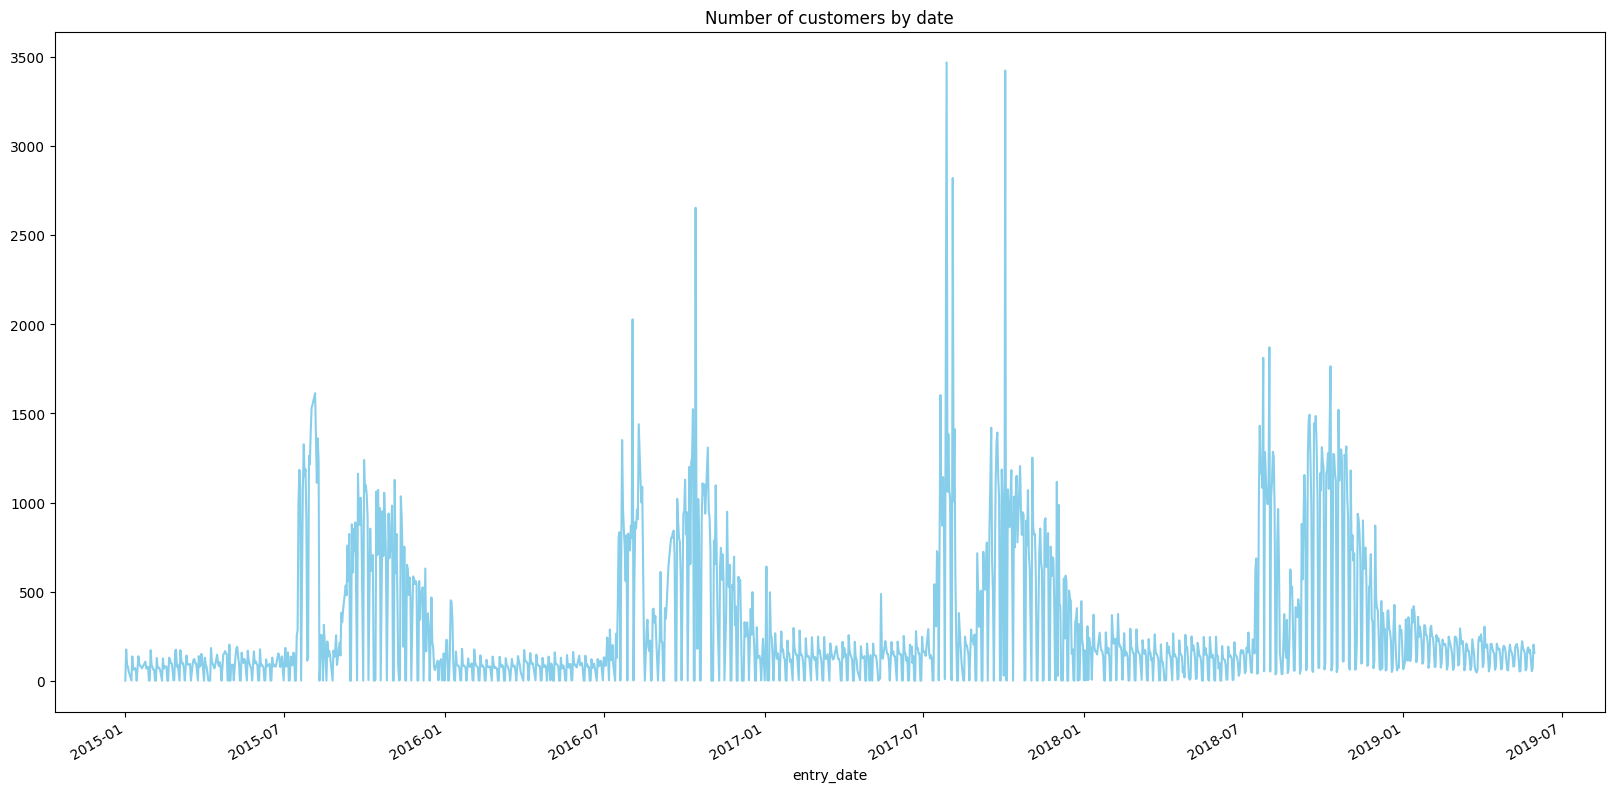

In [10]:
df_full.groupby("entry_date")["pk_cid"].nunique().plot(kind='line', figsize=(20, 10), color='skyblue', title='Number of customers by date')

El gráfico muestra que hay ciclos claros en la actividad de adquisición de clientes, con picos notables que podrían estar vinculados a eventos específicos, y una estabilización hacia el final del periodo. Analizar más a fondo las causas de estos picos podría proporcionar insights valiosos para futuras estrategias de crecimiento.

Los períodos principales son: Mediados de Julio hasta mediados de Agosto y desde Septiembre hasta mediados de Agosto y también a inicios de Enero, para cada año.

In [11]:
# con este codigo sacamos el grafico anterior de forma de dinamica con plotly, solo descomentar la linea final

import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Supongamos que ya tienes el DataFrame 'df_full' cargado y preparado

# Agrupar los datos por 'entry_date' y contar el número de clientes únicos por día
clientes_por_dia = df_full.groupby("entry_date")["pk_cid"].nunique()

# Crear la traza para Plotly
trace = go.Scatter(
    x=clientes_por_dia.index,
    y=clientes_por_dia.values,
    mode='lines+markers',
    name='Clientes por Día',
    line=dict(color='skyblue')
)

# Definir el layout del gráfico
layout = go.Layout(
    title='Number of Customers by Date',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Número de Clientes'),
    hovermode='closest'
)

# Crear la figura
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico dinámico
#pyo.plot(fig, filename='clientes_por_dia.html')

SEGMENTACION DE CLIENTES

In [12]:
df_full["segment"] = df_full["segment"].cat.add_categories(["Unknown"]).fillna("Unknown")
df_full["segment"].value_counts().apply(lambda x: x/df_full["segment"].count()*100)

segment
03 - UNIVERSITARIO   65.407
02 - PARTICULARES    30.704
Unknown               2.246
01 - TOP              1.642
Name: count, dtype: float64

OJOOOO

Al revisar los datos, se detectaron inconsistencias en la columna entry_date para ciertos clientes, donde la fecha de registro variaba entre diferentes particiones de datos. Dado que la entry_date debe representar un evento único en el tiempo, cualquier variabilidad en esta columna es indicativa de un posible error de datos. Esto podría haber sido causado por errores en la carga de datos, actualizaciones incorrectas, o fallos en la sincronización de bases de datos. Para garantizar la calidad y consistencia de los datos, se ha decidido corregir la entry_date al valor más temprano registrado para cada cliente, ya que este valor refleja con mayor precisión el verdadero momento de registro del cliente.

In [15]:
df_full[df_full["pk_cid"] == 383905]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
2943177,383905,2018-10-28,2018-10-24,KAT,0,Unknown,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,16.000,V,49,N,NaN
2954367,383905,2018-11-28,2018-11-02,KAT,1,Unknown,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,16.000,V,49,N,NaN
3627812,383905,2018-12-28,2018-11-02,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,16.000,V,49,N,NaN
4148804,383905,2019-01-28,2018-11-02,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,16.000,V,49,N,NaN
4479053,383905,2019-02-28,2018-11-02,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,16.000,V,49,N,NaN
4876516,383905,2019-03-28,2018-11-02,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,16.000,V,49,N,NaN
5133821,383905,2019-04-28,2018-11-02,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,16.000,V,49,N,NaN
5523902,383905,2019-05-28,2018-11-02,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,16.000,V,49,N,NaN


CLIENTES POR PK_PARTITION

In [17]:


# Ordenar los datos por 'pk_partition' y 'pk_cid'
df_full = df_full.sort_values(by=['pk_partition', 'pk_cid'])

# Crear una lista para almacenar los resultados
nuevos_clientes = []

# Obtener una lista única de particiones ordenadas
particiones = df_full['pk_partition'].unique()

# Iterar sobre las particiones comparando con la partición anterior
for i in range(1, len(particiones)):
    particion_actual = particiones[i]
    particion_anterior = particiones[i-1]
    
    # Obtener los clientes de la partición actual y anterior
    clientes_actuales = set(df_full[df_full['pk_partition'] == particion_actual]['pk_cid'])
    clientes_anteriores = set(df_full[df_full['pk_partition'] == particion_anterior]['pk_cid'])
    
    # Identificar nuevos clientes en la partición actual
    nuevos_en_particion_actual = clientes_actuales - clientes_anteriores
    
    # Añadir los nuevos clientes a la lista con la partición correspondiente
    for cliente in nuevos_en_particion_actual:
        nuevos_clientes.append({
            'pk_cid': cliente,
            'pk_partition': particion_actual
        })

# Convertir la lista de nuevos clientes en un DataFrame
df_nuevos_clientes = pd.DataFrame(nuevos_clientes)

# Mostrar el resultado
print(df_nuevos_clientes)


         pk_cid pk_partition
0       1384448   2018-02-28
1       1384456   2018-02-28
2       1384457   2018-02-28
3       1384458   2018-02-28
4       1376268   2018-02-28
...         ...          ...
221180  1548283   2019-05-28
221181  1548284   2019-05-28
221182  1548285   2019-05-28
221183  1548286   2019-05-28
221184  1548287   2019-05-28

[221185 rows x 2 columns]


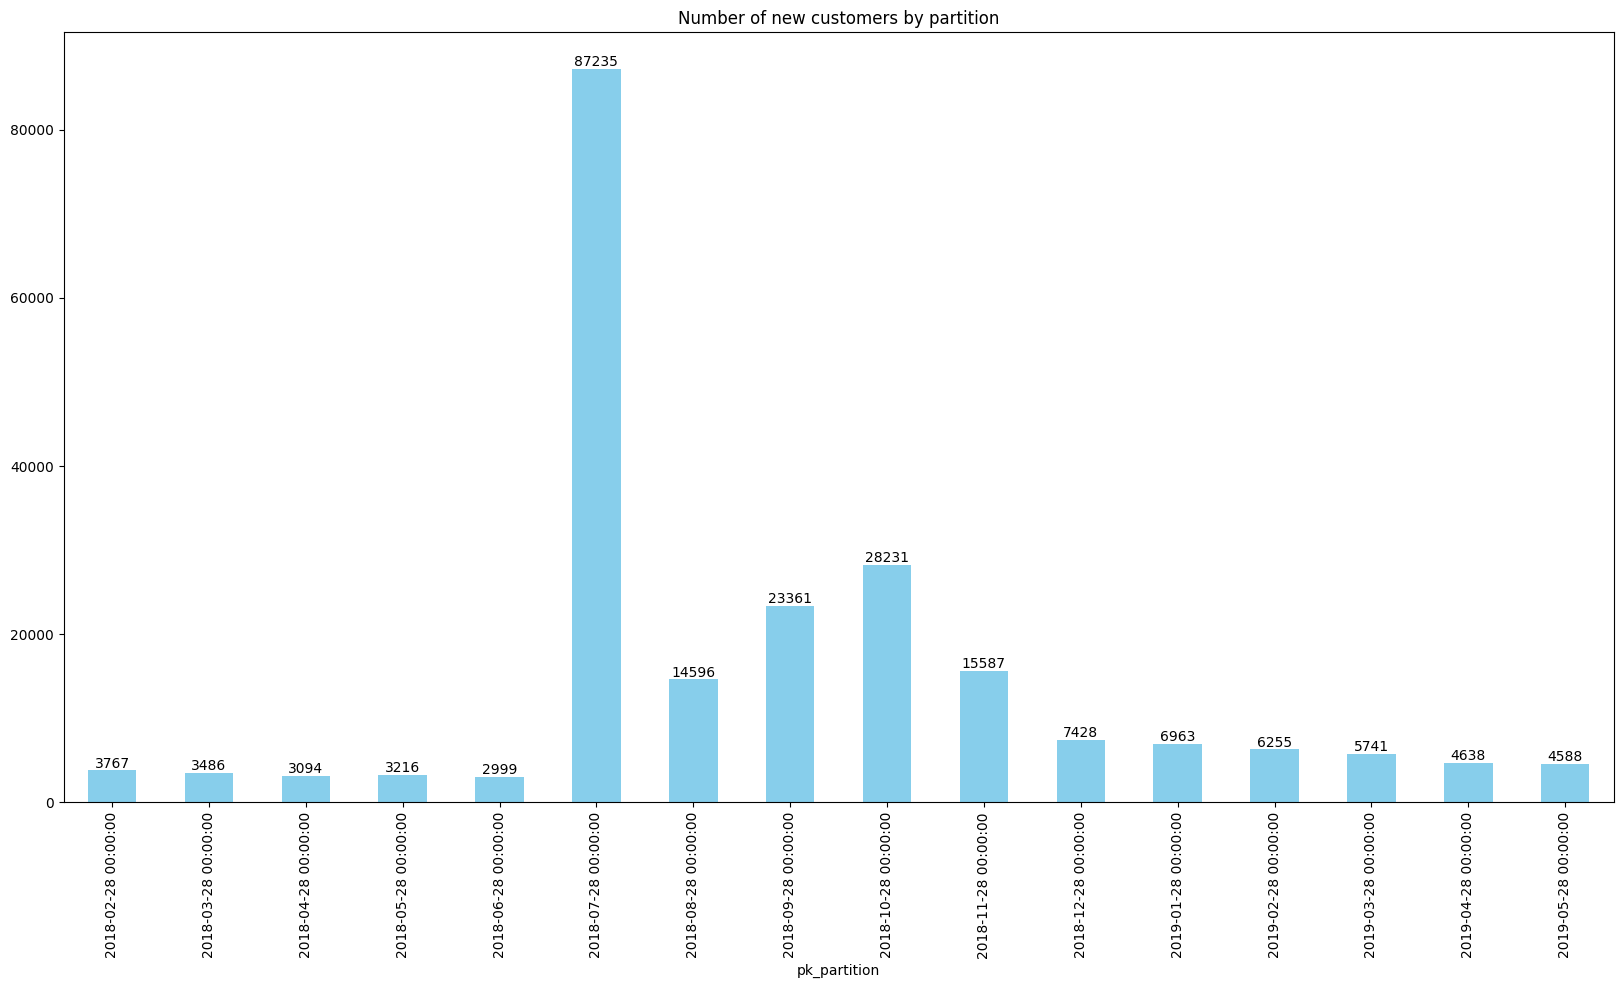

In [20]:
df_nuevos_clientes.groupby("pk_partition")["pk_cid"].nunique().plot(kind='bar', figsize=(20, 10), color='skyblue', title='Number of new customers by partition')
# quiero colocar el numero de clientes nuevos en cada barra
for i in range(len(df_nuevos_clientes.groupby("pk_partition")["pk_cid"].nunique())):
    plt.text(i, df_nuevos_clientes.groupby("pk_partition")["pk_cid"].nunique()[i], df_nuevos_clientes.groupby("pk_partition")["pk_cid"].nunique()[i], ha = 'center', va = 'bottom')

In [28]:
df_full.groupby("pk_cid")["pk_partition"].nunique().sum()

5962924

In [24]:
df_full["pk_cid"].nunique()

456373

In [23]:
df_full.groupby("pk_partition")["pk_cid"].nunique().sum()

5962924

In [22]:

# Supongamos que ya tienes el DataFrame cargado en 'df_full'

# Ordenar los datos por 'pk_partition' y 'pk_cid'
df_full = df_full.sort_values(by=['pk_partition', 'pk_cid'])

# Obtener una lista única de particiones ordenadas
particiones = df_full['pk_partition'].unique()

# Iterar sobre las particiones comparando con la partición anterior
for i in range(1, len(particiones)):
    particion_actual = particiones[i]
    particion_anterior = particiones[i-1]
    
    # Obtener los clientes de la partición actual y anterior
    clientes_actuales = set(df_full[df_full['pk_partition'] == particion_actual]['pk_cid'])
    clientes_anteriores = set(df_full[df_full['pk_partition'] == particion_anterior]['pk_cid'])
    
    # Identificar clientes que están en la partición actual pero no en la anterior
    nuevos_clientes = clientes_actuales - clientes_anteriores
    clientes_diferentes = clientes_anteriores - clientes_actuales
    
    # Verificar si hay clientes nuevos
    if nuevos_clientes:
        print(f"En la partición {particion_actual}, hay {len(nuevos_clientes)} clientes nuevos que no estaban en la partición {particion_anterior}.")
    else:
        print(f"No hay nuevos clientes en la partición {particion_actual} respecto a la partición {particion_anterior}.")

    # Verificar si hay clientes que ya no están en la partición actual
    if clientes_diferentes:
        print(f"En la partición {particion_actual}, hay {len(clientes_diferentes)} clientes que estaban en la partición {particion_anterior} pero no en la actual.")
    else:
        print(f"Todos los clientes de la partición {particion_anterior} están presentes en la partición {particion_actual}.")

En la partición 2018-02-28 00:00:00, hay 3767 clientes nuevos que no estaban en la partición 2018-01-28 00:00:00.
En la partición 2018-02-28 00:00:00, hay 739 clientes que estaban en la partición 2018-01-28 00:00:00 pero no en la actual.
En la partición 2018-03-28 00:00:00, hay 3486 clientes nuevos que no estaban en la partición 2018-02-28 00:00:00.
En la partición 2018-03-28 00:00:00, hay 749 clientes que estaban en la partición 2018-02-28 00:00:00 pero no en la actual.
En la partición 2018-04-28 00:00:00, hay 3094 clientes nuevos que no estaban en la partición 2018-03-28 00:00:00.
En la partición 2018-04-28 00:00:00, hay 889 clientes que estaban en la partición 2018-03-28 00:00:00 pero no en la actual.
En la partición 2018-05-28 00:00:00, hay 3216 clientes nuevos que no estaban en la partición 2018-04-28 00:00:00.
En la partición 2018-05-28 00:00:00, hay 753 clientes que estaban en la partición 2018-04-28 00:00:00 pero no en la actual.
En la partición 2018-06-28 00:00:00, hay 2999 cl

In [3]:
df_partition_one = df_full[df_full["pk_partition"] == "2018-01-28"]
df_partition_two = df_full[df_full["pk_partition"] == "2018-02-28"]
df_partition_three = df_full[df_full["pk_partition"] == "2018-03-28"]
df_partition_four = df_full[df_full["pk_partition"] == "2018-04-28"]
df_partition_five = df_full[df_full["pk_partition"] == "2018-05-28"]
df_partition_six = df_full[df_full["pk_partition"] == "2018-06-28"]
df_partition_seven = df_full[df_full["pk_partition"] == "2018-07-28"]
df_partition_eight = df_full[df_full["pk_partition"] == "2018-08-28"]
df_partition_nine = df_full[df_full["pk_partition"] == "2018-09-28"]
df_partition_ten = df_full[df_full["pk_partition"] == "2018-10-28"]
df_partition_eleven = df_full[df_full["pk_partition"] == "2018-11-28"]
df_partition_twelve = df_full[df_full["pk_partition"] == "2018-12-28"]
df_partition_thirteen = df_full[df_full["pk_partition"] == "2019-01-28"]
df_partition_fourteen = df_full[df_full["pk_partition"] == "2019-02-28"]
df_partition_fifteen = df_full[df_full["pk_partition"] == "2019-03-28"]
df_partition_sixteen = df_full[df_full["pk_partition"] == "2019-04-28"]
df_partition_seventeen = df_full[df_full["pk_partition"] == "2019-05-28"]


In [40]:
df_partitions = [df_partition_one, df_partition_two, df_partition_three, df_partition_four, df_partition_five,
                 df_partition_six, df_partition_seven, df_partition_eight, df_partition_nine, df_partition_ten, 
                 df_partition_eleven, df_partition_twelve, df_partition_thirteen, 
                 df_partition_fourteen, df_partition_fifteen, df_partition_sixteen, df_partition_seventeen]

In [23]:
for i in df_partitions:
    if len(i) != i["pk_cid"].nunique():
        print(f"Hay duplicados en la partición {i['pk_partition'].unique()}")
    else:
        print(f"No hay duplicados en la partición {i['pk_partition'].unique()}")

No hay duplicados en la partición ['2018-01-28']
No hay duplicados en la partición ['2018-02-28']
No hay duplicados en la partición ['2018-03-28']
No hay duplicados en la partición ['2018-04-28']
No hay duplicados en la partición ['2018-05-28']
No hay duplicados en la partición ['2018-06-28']
No hay duplicados en la partición ['2018-07-28']
No hay duplicados en la partición ['2018-08-28']
No hay duplicados en la partición ['2018-09-28']
No hay duplicados en la partición ['2018-10-28']
No hay duplicados en la partición ['2018-11-28']
No hay duplicados en la partición ['2018-12-28']
No hay duplicados en la partición ['2019-01-28']
No hay duplicados en la partición ['2019-02-28']
No hay duplicados en la partición ['2019-03-28']
No hay duplicados en la partición ['2019-04-28']
No hay duplicados en la partición ['2019-05-28']


In [4]:
df_partition_one.dtypes

pk_cid                         int64
pk_partition          datetime64[ns]
entry_date            datetime64[ns]
entry_channel               category
active_customer                int32
segment                     category
short_term_deposit             int32
loans                          int32
mortgage                       int32
funds                          int32
securities                     int32
long_term_deposit              int32
em_account_pp                  int64
credit_card                    int32
payroll                      float64
pension_plan                 float64
payroll_account                int32
emc_account                    int32
debit_card                     int32
em_account_p                   int32
em_acount                      int32
country_id                  category
region_code                 category
gender                      category
age                            int32
deceased                    category
salary                       float64
d

<Axes: >

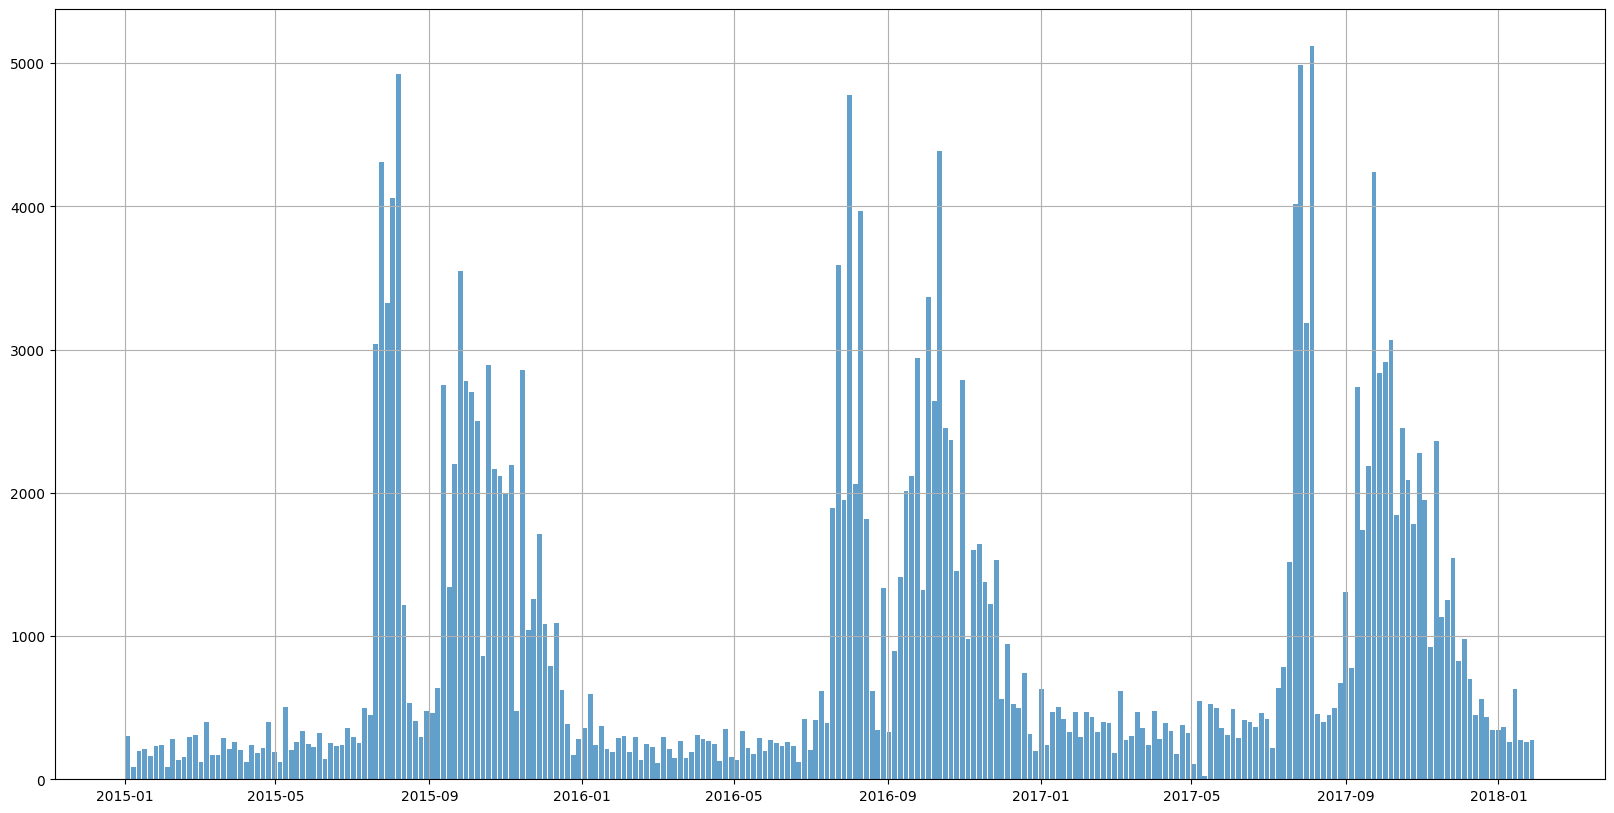

In [5]:
# histograma de la variable entry_date
df_partition_one['entry_date'].hist(bins=250, figsize=(20,10), alpha=0.7, rwidth=0.85)

<Axes: >

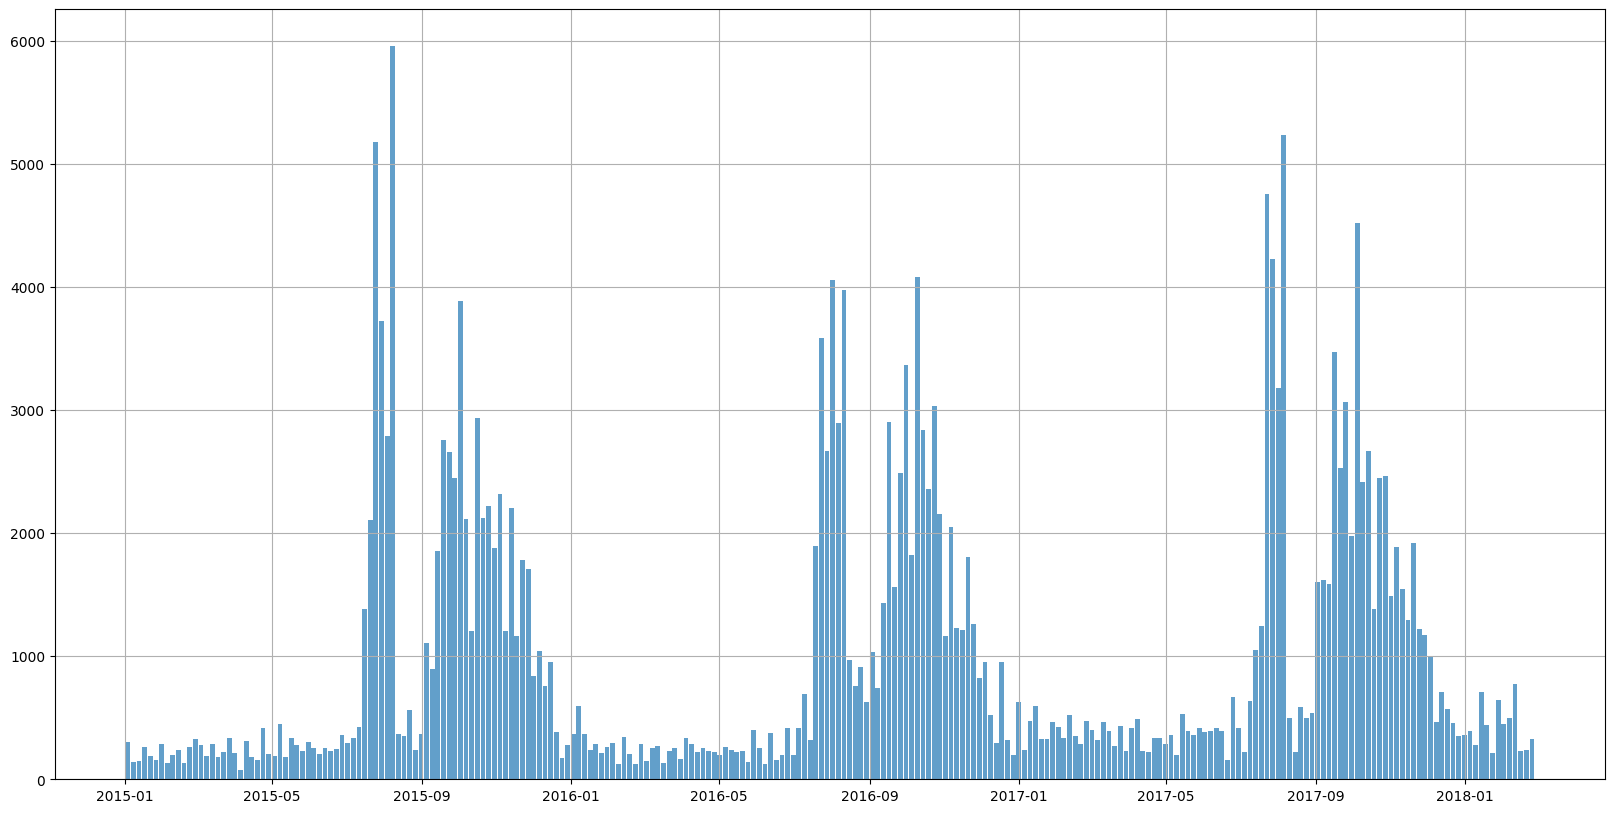

In [12]:
df_partition_two['entry_date'].hist(bins=250, figsize=(20,10), alpha=0.7, rwidth=0.85)

In [16]:
df_partition_one['entry_date'].value_counts().sort_index()

entry_date
2015-01-01      1
2015-01-02    139
2015-01-03     68
2015-01-04     57
2015-01-05     35
             ... 
2018-01-26    110
2018-01-27     81
2018-01-28     47
2018-01-29     29
2018-01-30      4
Name: count, Length: 984, dtype: int64

In [15]:
df_partition_two['entry_date'].value_counts().sort_index().sum()

242432

In [34]:
nuevooo = df_partition_two[["pk_cid", "entry_date"]]
nuevooo

,pk_cid,entry_date
239493,545019,2015-02-09
239494,545354,2018-01-16
239495,544616,2015-02-13
239496,546275,2018-02-09
239497,546332,2017-05-20
...,...,...
482009,1057281,2015-09-10
482010,1057270,2015-09-10
482011,1057282,2015-09-10
482012,1057504,2015-09-10


In [26]:
nuevo = df_partition_two["entry_date"].value_counts().sort_index().reset_index()["pk_cid"]
nuevo

KeyError: 'pk_cid'

In [19]:
df_comparacion = pd.merge(df_partition_one[['pk_cid', 'entry_date']], df_partition_two[['pk_cid', 'entry_date']], on='pk_cid', suffixes=('_actual', '_anterior'), how='outer')


In [41]:
# Supongamos que tienes un DataFrame principal llamado 'df' con las 17 particiones



# Crear un DataFrame vacío para almacenar los resultados
df_resultado = pd.DataFrame()

# Iterar sobre cada partición y contar clientes por día
for particion in df_partitions:
    # Contar clientes por día para la partición actual
    conteo_por_dia = particion["entry_date"].value_counts().sort_index()
    
    # Asegurar que la columna tenga un nombre representativo
    df_resultado[particion] = conteo_por_dia

# Rellenar con ceros los valores faltantes (en caso de que no haya clientes registrados en ciertos días)
df_resultado = df_resultado.fillna(0)

# Mostrar la tabla resultante
print(df_resultado)

TypeError: Must pass DataFrame or 2-d ndarray with boolean values only

In [38]:
df_comparacion

,pk_cid,entry_date_actual,entry_date_anterior
0,17457,2017-09-16,2017-09-16
1,17799,2018-01-04,2018-01-04
2,17970,2015-04-16,2015-04-16
3,18704,2017-01-20,2017-01-20
4,18956,2015-06-18,2015-06-18
...,...,...,...
243255,1385006,NaT,2018-02-26
243256,1385008,NaT,2018-02-26
243257,1385024,NaT,2018-02-26
243258,1385033,NaT,2018-02-26


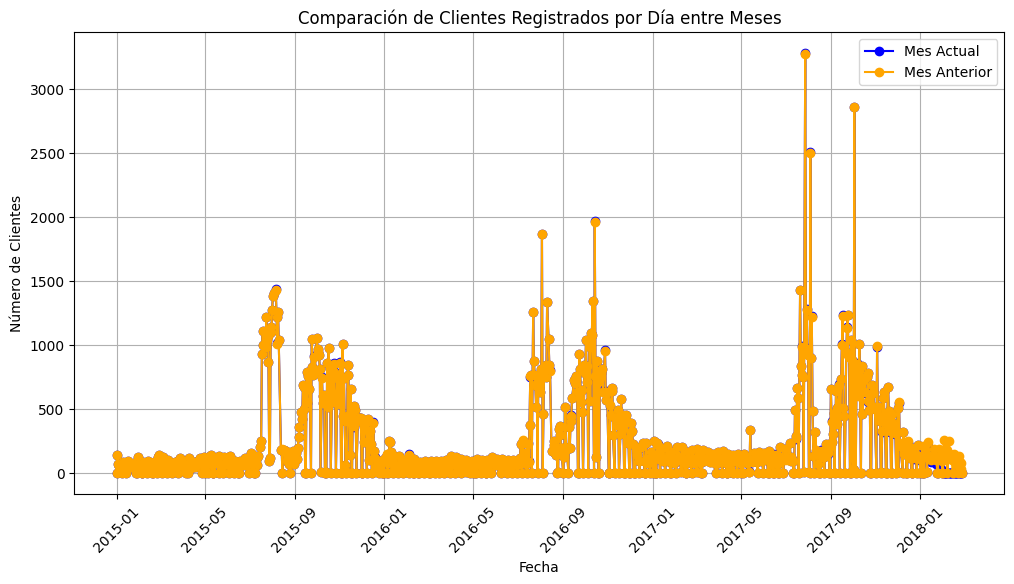

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame cargado en 'df'

# Filtrar clientes con fechas válidas en ambos meses (excluyendo NaT para un análisis limpio)
df_actual = df_comparacion[df_comparacion['entry_date_actual'].notna()]
df_anterior = df_comparacion[df_comparacion['entry_date_anterior'].notna()]

# Contar el número de clientes registrados por día en el mes actual y anterior
clientes_por_dia_actual = df_actual['entry_date_actual'].value_counts().sort_index()
clientes_por_dia_anterior = df_anterior['entry_date_anterior'].value_counts().sort_index()

# Asegurar que ambos índices (fechas) estén alineados para facilitar la comparación
clientes_por_dia_actual = clientes_por_dia_actual.reindex(clientes_por_dia_anterior.index, fill_value=0)
clientes_por_dia_anterior = clientes_por_dia_anterior.reindex(clientes_por_dia_actual.index, fill_value=0)

plt.figure(figsize=(12, 6))

# Graficar el mes actual
plt.plot(clientes_por_dia_actual.index, clientes_por_dia_actual.values, marker='o', label='Mes Actual', color='blue')

# Graficar el mes anterior
plt.plot(clientes_por_dia_anterior.index, clientes_por_dia_anterior.values, marker='o', label='Mes Anterior', color='orange')

# Añadir detalles al gráfico
plt.title('Comparación de Clientes Registrados por Día entre Meses')
plt.xlabel('Fecha')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

In [23]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Supongamos que ya tienes el DataFrame cargado en 'df'

# Filtrar clientes con fechas válidas en ambos meses (excluyendo NaT para un análisis limpio)
df_actual = df_comparacion[df_comparacion['entry_date_actual'].notna()]
df_anterior = df_comparacion[df_comparacion['entry_date_anterior'].notna()]

# Contar el número de clientes registrados por día en el mes actual y anterior
clientes_por_dia_actual = df_actual['entry_date_actual'].value_counts().sort_index()
clientes_por_dia_anterior = df_anterior['entry_date_anterior'].value_counts().sort_index()

# Asegurar que ambos índices (fechas) estén alineados para facilitar la comparación
clientes_por_dia_actual = clientes_por_dia_actual.reindex(clientes_por_dia_anterior.index, fill_value=0)
clientes_por_dia_anterior = clientes_por_dia_anterior.reindex(clientes_por_dia_actual.index, fill_value=0)

# Crear las trazas para Plotly
trace_actual = go.Scatter(
    x=clientes_por_dia_actual.index,
    y=clientes_por_dia_actual.values,
    mode='lines+markers',
    name='Mes Actual',
    line=dict(color='blue')
)

trace_anterior = go.Scatter(
    x=clientes_por_dia_anterior.index,
    y=clientes_por_dia_anterior.values,
    mode='lines+markers',
    name='Mes Anterior',
    line=dict(color='orange')
)

# Crear la figura
data = [trace_actual, trace_anterior]
layout = go.Layout(
    title='Comparación de Clientes Registrados por Día entre Meses',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Número de Clientes'),
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)

# Mostrar el gráfico interactivo
pyo.plot(fig, filename='comparacion_clientes.html')

'comparacion_clientes.html'

In [10]:
df_full["pk_cid"].value_counts().sort_values(ascending=False).head(10)

pk_cid
1250752    2
1518961    2
1083881    2
1534231    2
1402398    2
1542479    2
383905     2
1050619    1
1050623    1
1050622    1
Name: count, dtype: int64

In [18]:
df_full[df_full["pk_cid"] == 1542479].T

,4877001,5673515
pk_cid,1542479,1542479
pk_partition,2019-03-28,2019-05-28
entry_date,2019-03-31,2015-11-29
entry_channel,None,KHM
active_customer,0.00,1.00
segment,None,03 - UNIVERSITARIO
short_term_deposit,0,0
loans,0,0
mortgage,0,0
funds,0,0


In [4]:
# para ver la cantidad de columnas con nulos en %
df_full.isna().mean().sort_values(ascending=False).apply(lambda x: x*100).sort_values(ascending=False).head(5)

salary          34.39
segment         29.13
entry_channel   28.89
entry_date       0.32
region_code      0.03
dtype: float64

1. La ingesta de datos se realiza en enero de 2018 y la última partición es de mayo de 2019, siendo un total 17 particiones o ingestas de datos.

2. En cada ingesta se repiten los clientes y se deciden eliminar los clientes duplicados pasando de un dataset de casi 6 millones de registro a 456,373 registros.

3. Se elimina la columna "em_account_pp" ya que ningun cliente posee una Cuenta easyMoney++

4. Las columnas con valores faltantes son:
   
    - salary  :             34.39 (%)

   - segment   :           29.13

    - entry_channel  :      28.89

    - entry_date    :        0.32

    - region_code   :        0.03

    - payroll   :            0.01

    - pension_plan  :        0.01

    - gender      :          0.01
  
5. A continuación se muestra la descripción del dataset teniendo en cuenta cada variable en particular.

    - Según el histograma de Fecha en la que realizó la primera contratación a través de easyMoney se observa períodos de forma anual donde hay mayor contratación.
   
    - Los canales de captación de los clientes más utilizados son: KHE, KFC, KAT y KHK, siendo el primero el más relevante.
  
    - Los clientes están segmentados en 3 tipos: universitarios, particulares y top, siendo universitarios practicamente el doble de particulares.
 
    - El 36% de los clientes están activos en la aplicación.

    - Estamos en presencia de una baja adopción de productos financieros entre los clientes, de forma general. Solo el servicio de la Cuenta Easy Money es el más contratado con un 67 %.

    - Prácticamente el 99% de los clientes son españoles, el resto pertenece a distintos países.

    - Son múltiples las regiones donde residen los clientes siendo la más significativa la región 28 con un 22%.

    - La relación de géneros entre los clientes es bastante equitativa, el 51% son hombres y el resto son mujeres.

    - La mayor cantidad de clientes se encuentran dentro del rango de edad entre 20 y 40 años.

    - Los Ingresos brutos de la unidad familiar son variados y presenta valores demasiado elevados que hay que corregir.

    - Solo 55 clientes han fallecido, del total de clientes a lo largo de los años.

6. A continuación se muestra la descripción del dataset relacionando variables.

    - El 35% de los hombres tienen la cuenta Easy Money y el resto o tiene otros productos contratados o no tienen nada más, y lo mismo pasa con las mujeres con un 32%.

    - 

# ACTIVIDAD COMERCIAL

<Axes: >

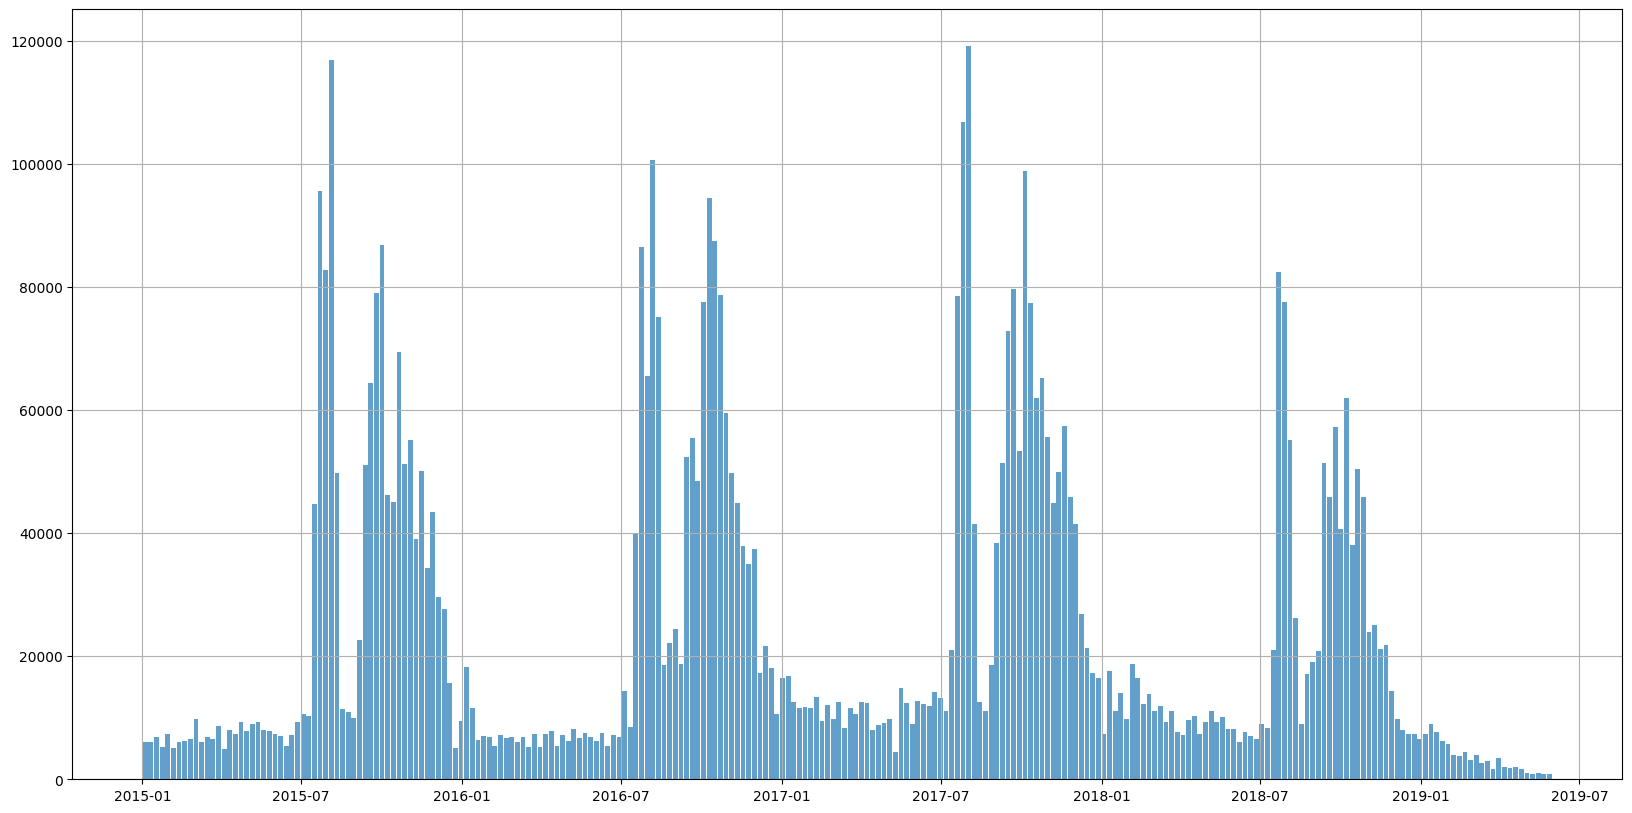

In [7]:
# histograma de la variable entry_date
df_full['entry_date'].hist(bins=250, figsize=(20,10), alpha=0.7, rwidth=0.85)

Investigar qué eventos específicos coinciden con los picos para entender mejor qué impulsa la contratación de clientes en esos periodos.


Evaluar la Estacionalidad: Confirmar si estos patrones se repiten anualmente y si hay acciones estratégicas que se puedan tomar para mejorar la contratación en los periodos de baja actividad.

Descomponer la información por segmentos de clientes, productos o regiones para ver si estas tendencias son generales o específicas de algún segmento.



<Axes: xlabel='entry_channel'>

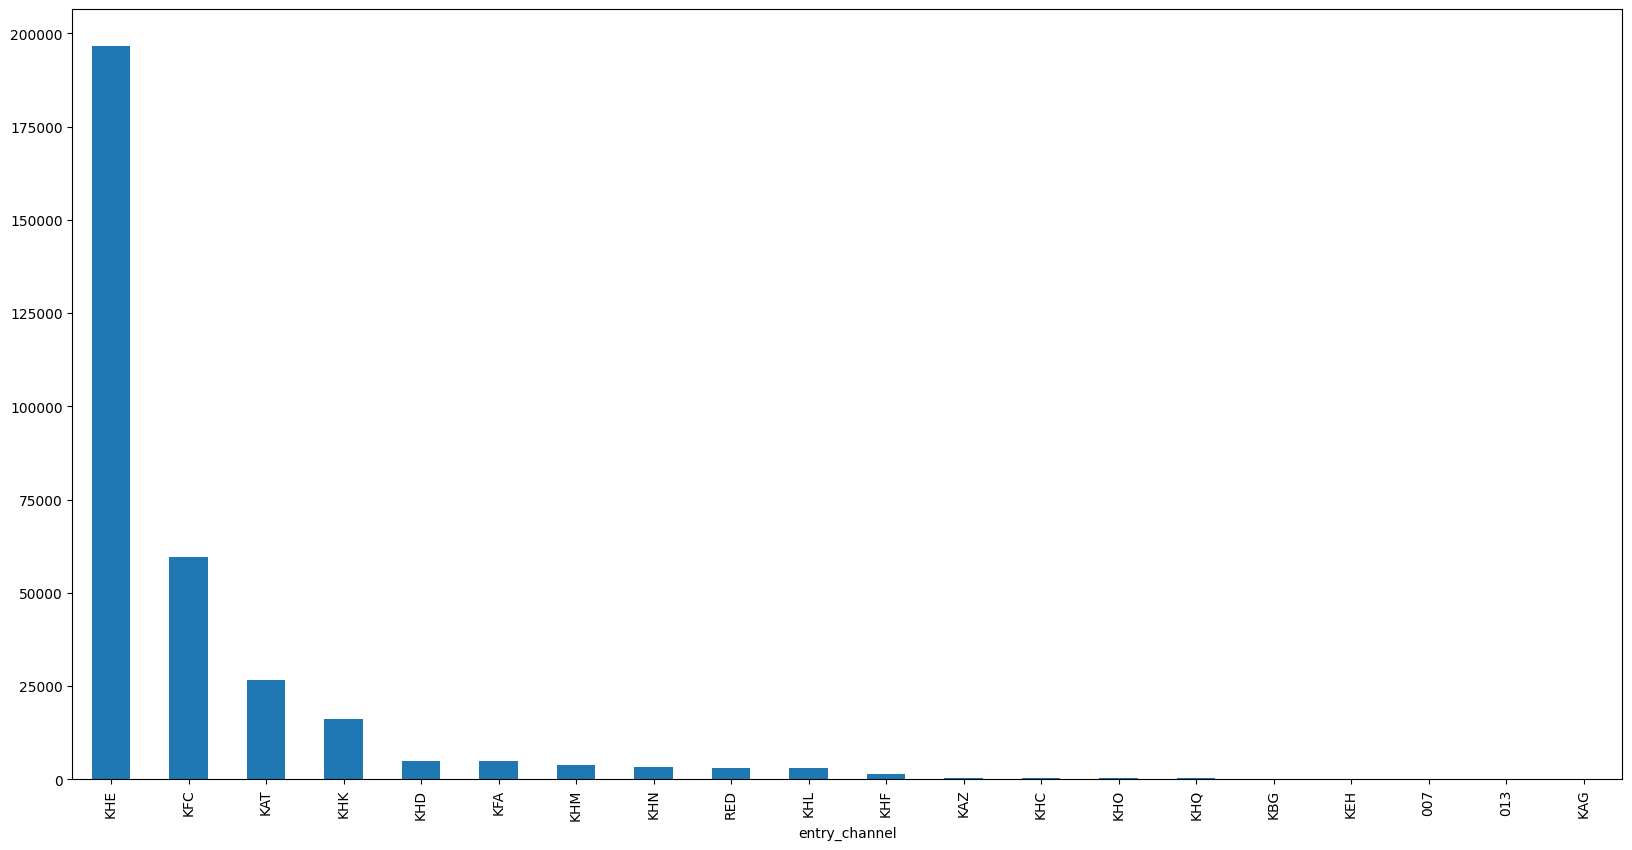

In [6]:
# gráfico de barras de la variable entry_channel para ver los canales de entrada mas utilizados
df_full['entry_channel'].value_counts().sort_values(ascending = False).head(20).plot(kind='bar', figsize=(20,10))

<Axes: xlabel='segment'>

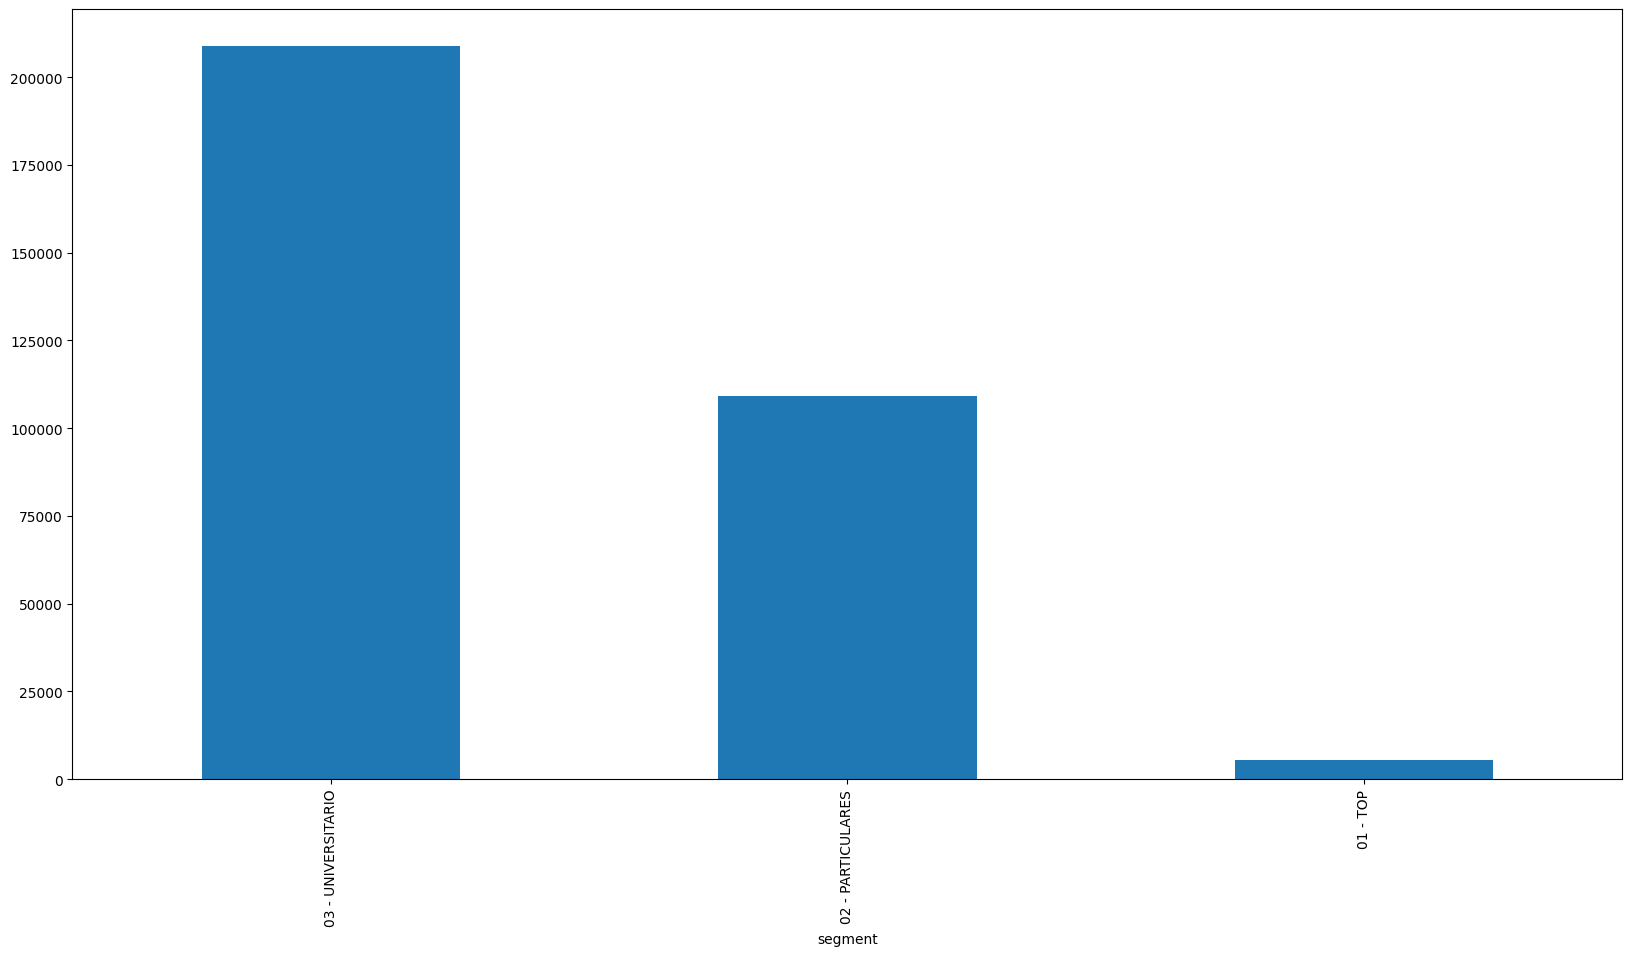

In [7]:
# grafico de barras de la variable segment para ver la distribución de los segmentos
df_full['segment'].value_counts().sort_values(ascending = False).head(20).plot(kind='bar', figsize=(20,10))

active_customer
0   63.57
1   36.43
Name: count, dtype: float64


<Axes: xlabel='active_customer'>

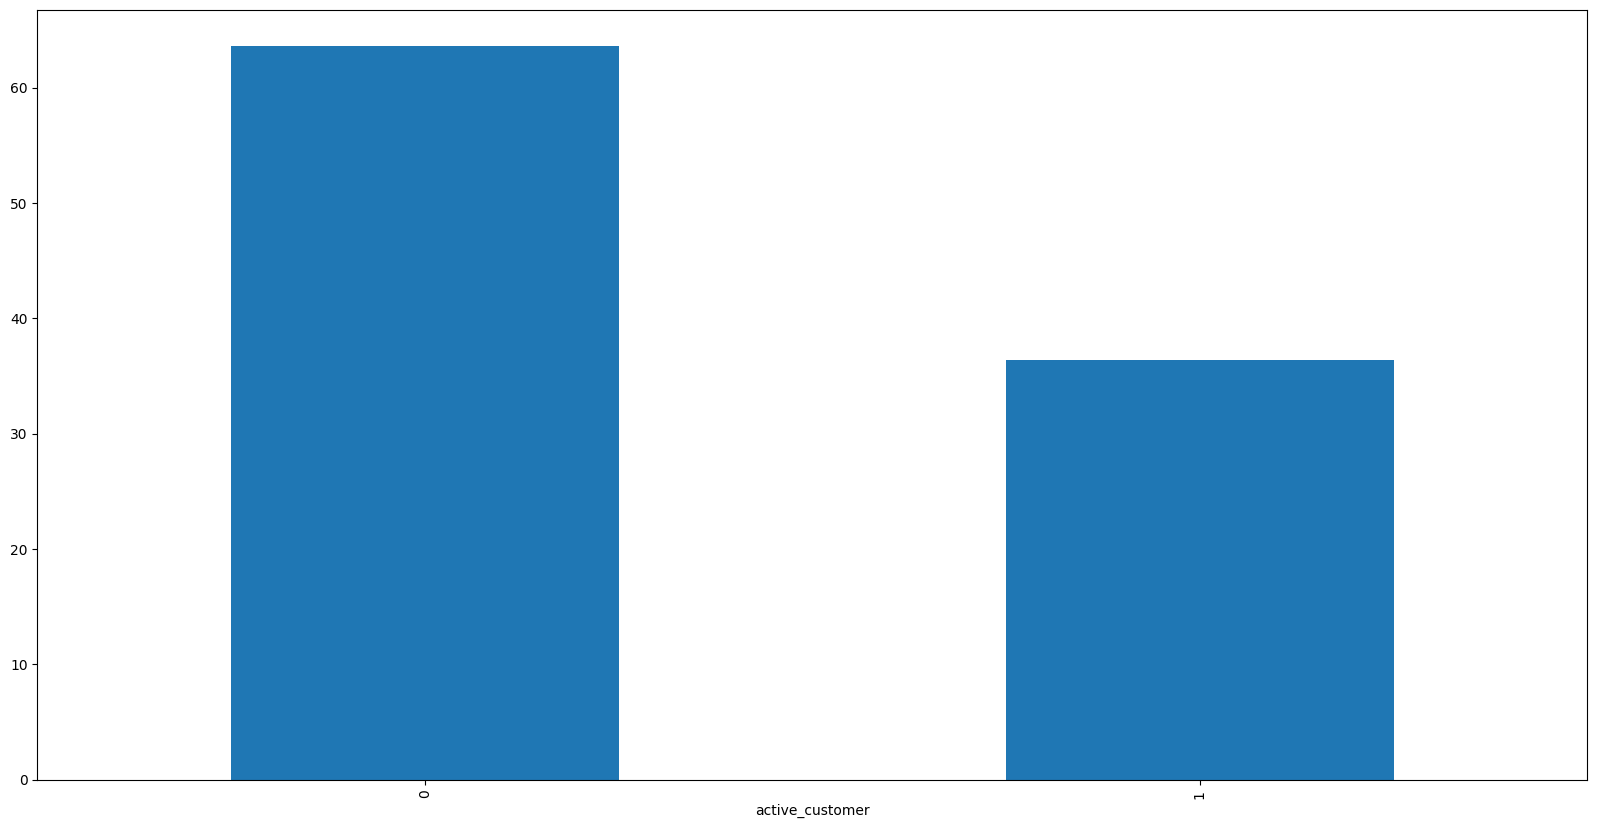

In [8]:
# para active_customer
print(df_full['active_customer'].value_counts().apply(lambda x: x/df_full.shape[0]*100))
df_full['active_customer'].value_counts().apply(lambda x: x/df_full.shape[0]*100).plot(kind='bar', figsize=(20,10))

# Productos financieros

em_acount
1   67.16
0   32.84
Name: count, dtype: float64


<Axes: xlabel='em_acount'>

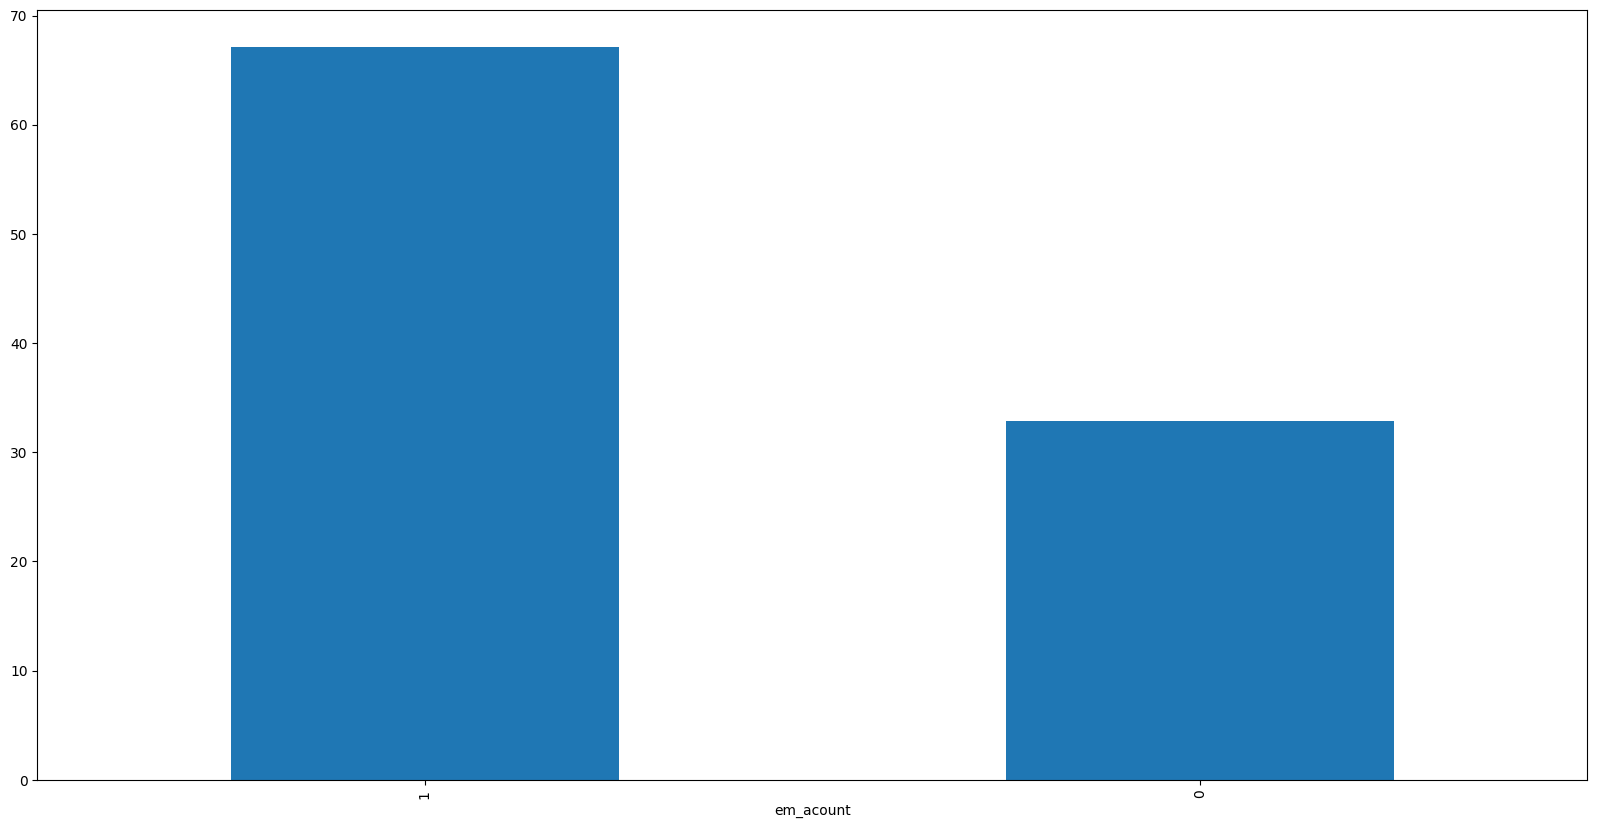

In [9]:
# Cuenta Easy Money
print(df_full['em_acount'].value_counts().apply(lambda x: x/df_full.shape[0]*100))
df_full['em_acount'].value_counts().apply(lambda x: x/df_full.shape[0]*100).plot(kind='bar', figsize=(20,10))

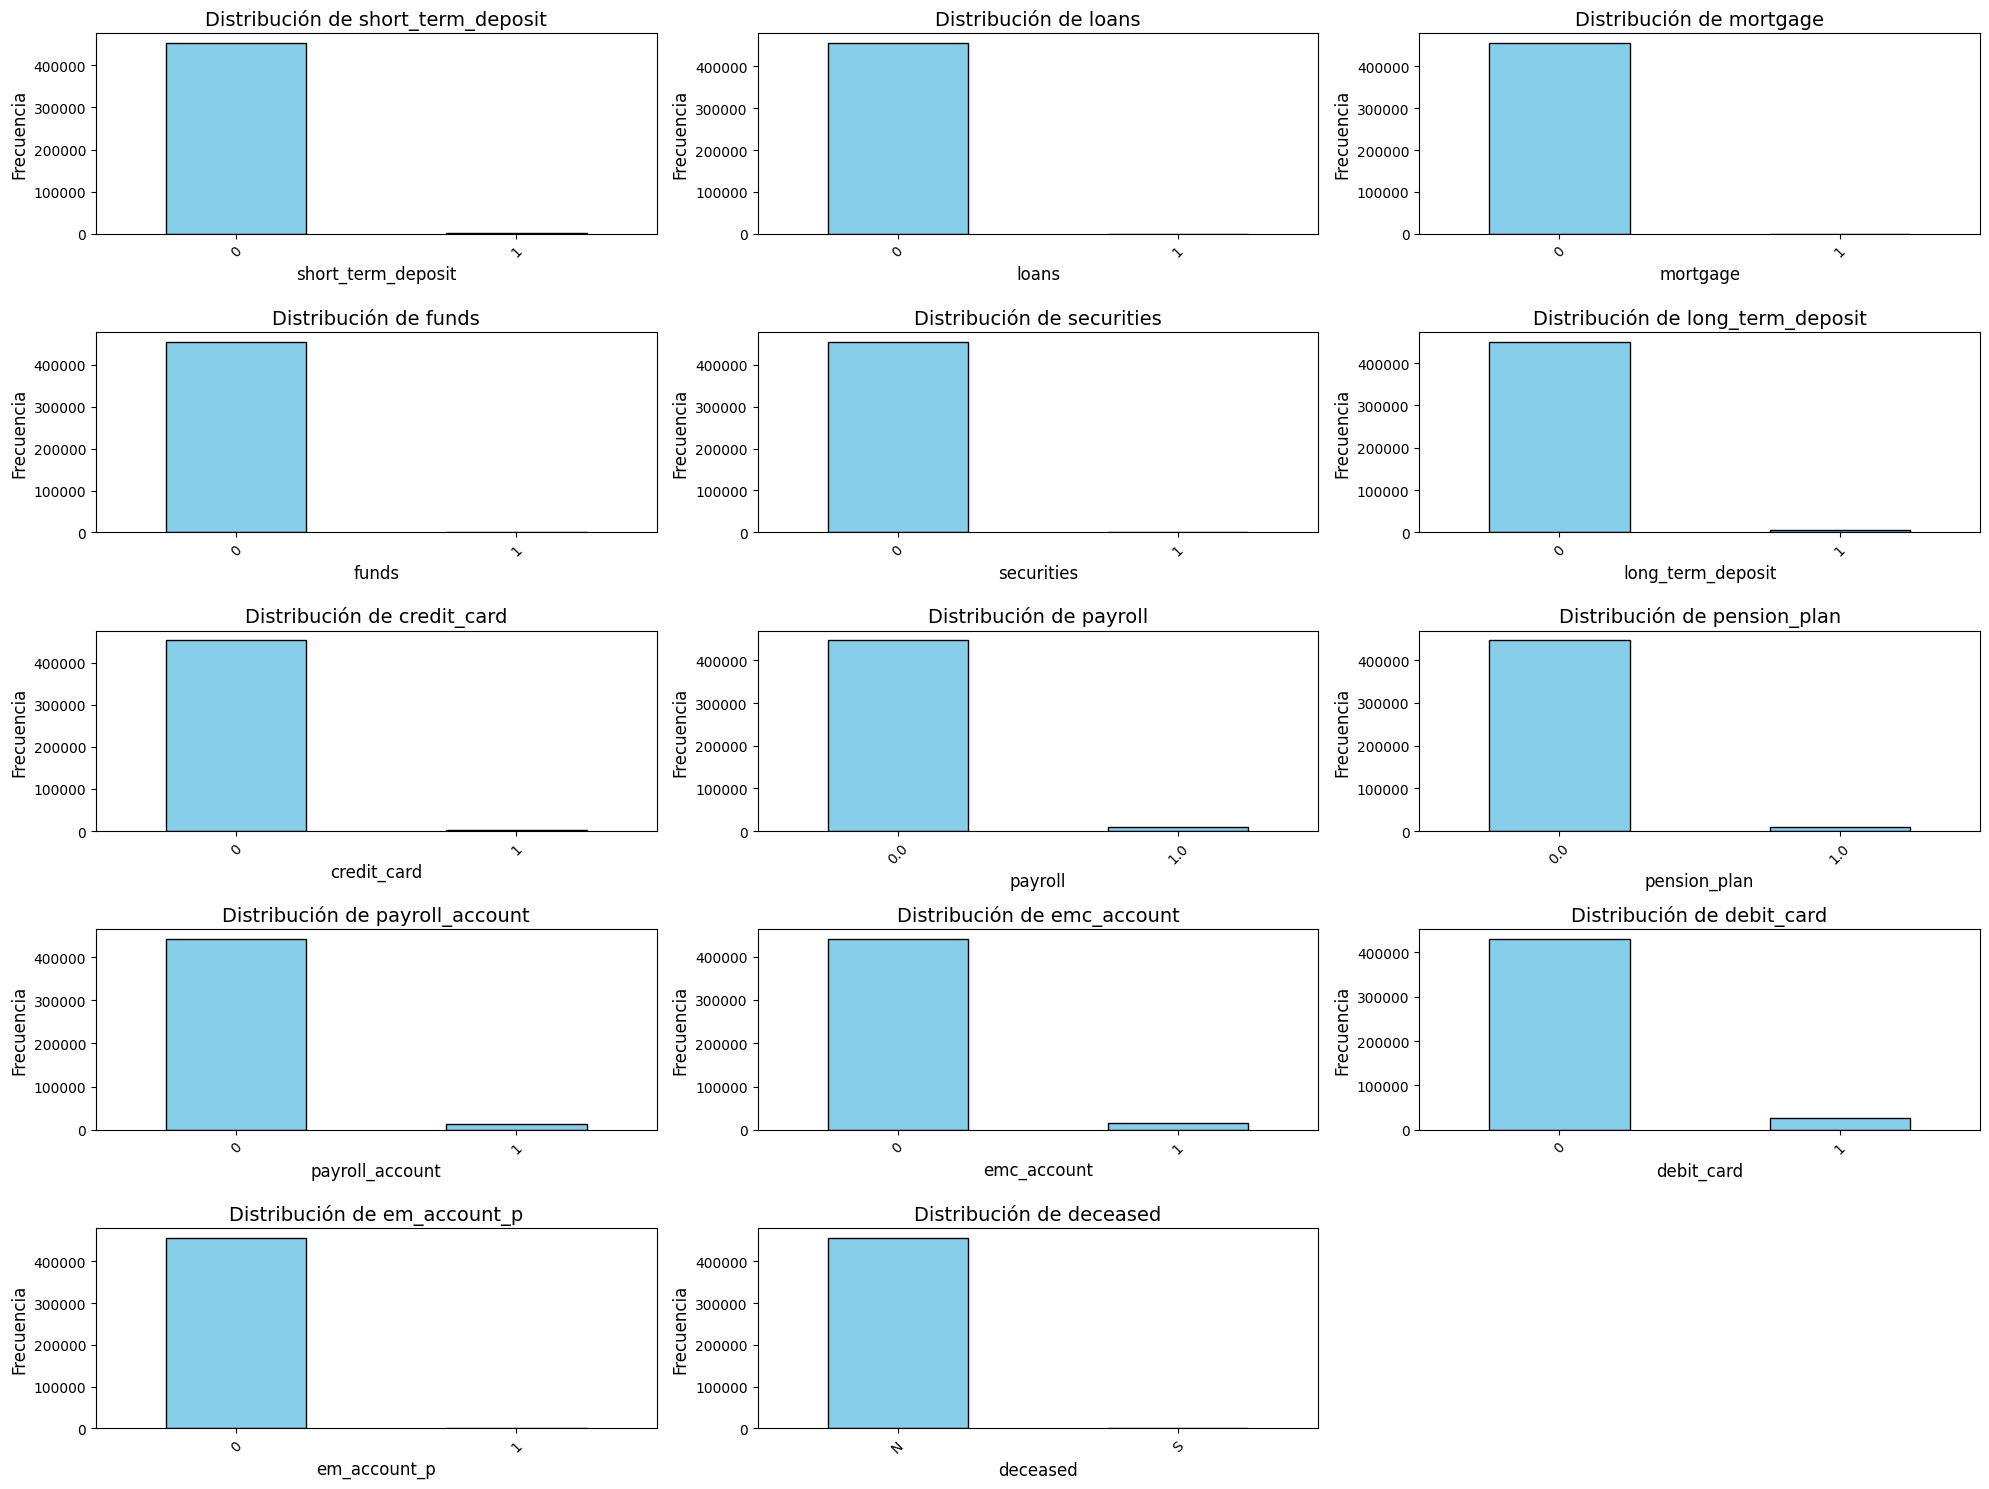

In [10]:

# PRODUCTOS FINANCIEROS
# Lista de productos financieros desbalanceadas
columns_to_plot = ['short_term_deposit', 'loans', 'mortgage',
                   'funds', 'securities', 'long_term_deposit', 'credit_card',
                   'payroll', 'pension_plan', 'payroll_account', 'emc_account',
                   'debit_card', 'em_account_p', 'deceased']

# Configuración de subplots
n_cols = 3  # Número de columnas en el grid de subplots
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calcula el número de filas necesarias

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axs = axs.flatten()  # Aplanar la matriz de subplots para iterar fácilmente

# Crea un gráfico de barras para cada columna
for i, column in enumerate(columns_to_plot):
    df_full[column].value_counts().plot(kind='bar', ax=axs[i], color='skyblue', edgecolor='black')
    axs[i].set_title(f'Distribución de {column}', fontsize=14)
    axs[i].set_xlabel(column, fontsize=12)
    axs[i].set_ylabel('Frecuencia', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)

# Elimina subplots vacíos si los hay
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()  # Ajusta el espaciado
plt.show()

El análisis sugiere que hay una baja adopción de productos financieros entre los clientes, lo que representa tanto un desafío como una oportunidad. Para aumentar la penetración de estos productos, será necesario entender mejor las necesidades y motivaciones de los clientes, y potencialmente adaptar las estrategias de marketing y ventas para hacer estos productos más atractivos y accesibles.

# SOCIODEMOGRÁFICO

country_id
ES    456223
GB        31
FR        16
US        13
CH        13
DE        12
BE         6
VE         5
BR         5
MX         4
Name: count, dtype: int64


<Axes: xlabel='country_id'>

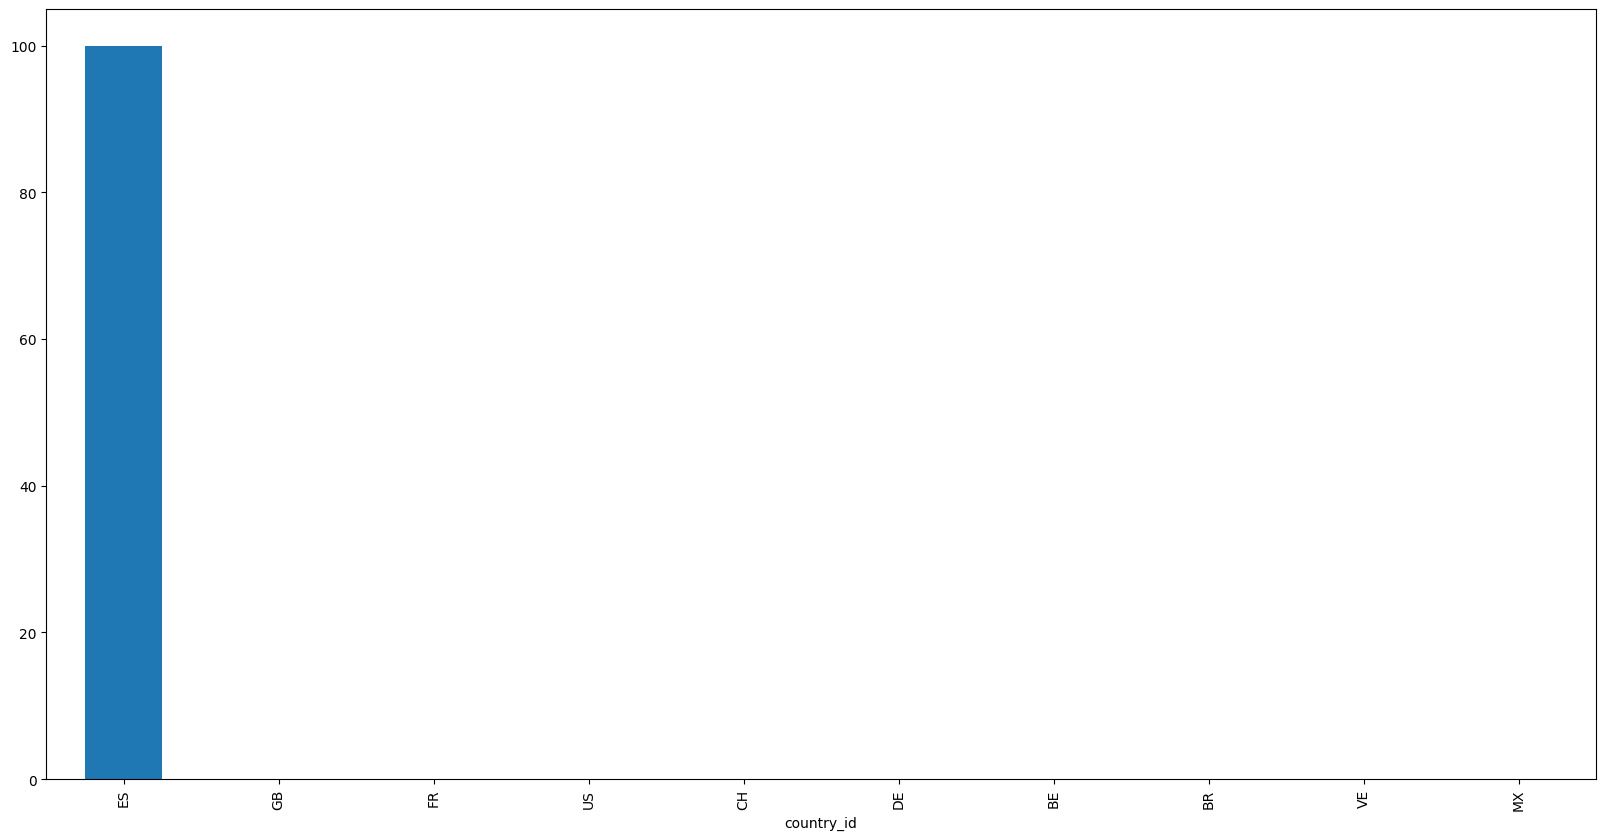

In [11]:
# grafico para la variable country_id
print(df_full['country_id'].value_counts().head(10))
df_full['country_id'].value_counts().sort_values(ascending = False).head(10).apply(lambda x: x/df_full.shape[0]*100).plot(kind='bar', figsize=(20,10))

region_code
28.00   0.22
8.00    0.10
46.00   0.06
30.00   0.05
41.00   0.05
15.00   0.04
29.00   0.03
3.00    0.03
36.00   0.03
11.00   0.03
33.00   0.02
50.00   0.02
35.00   0.02
6.00    0.02
47.00   0.02
45.00   0.02
18.00   0.02
37.00   0.01
10.00   0.01
14.00   0.01
39.00   0.01
7.00    0.01
2.00    0.01
13.00   0.01
21.00   0.01
12.00   0.01
43.00   0.01
32.00   0.01
17.00   0.01
27.00   0.01
9.00    0.01
25.00   0.01
48.00   0.01
24.00   0.01
4.00    0.01
26.00   0.01
38.00   0.01
16.00   0.01
23.00   0.01
31.00   0.01
19.00   0.01
49.00   0.00
34.00   0.00
22.00   0.00
40.00   0.00
5.00    0.00
20.00   0.00
1.00    0.00
44.00   0.00
42.00   0.00
51.00   0.00
52.00   0.00
Name: proportion, dtype: float64


<Axes: xlabel='region_code'>

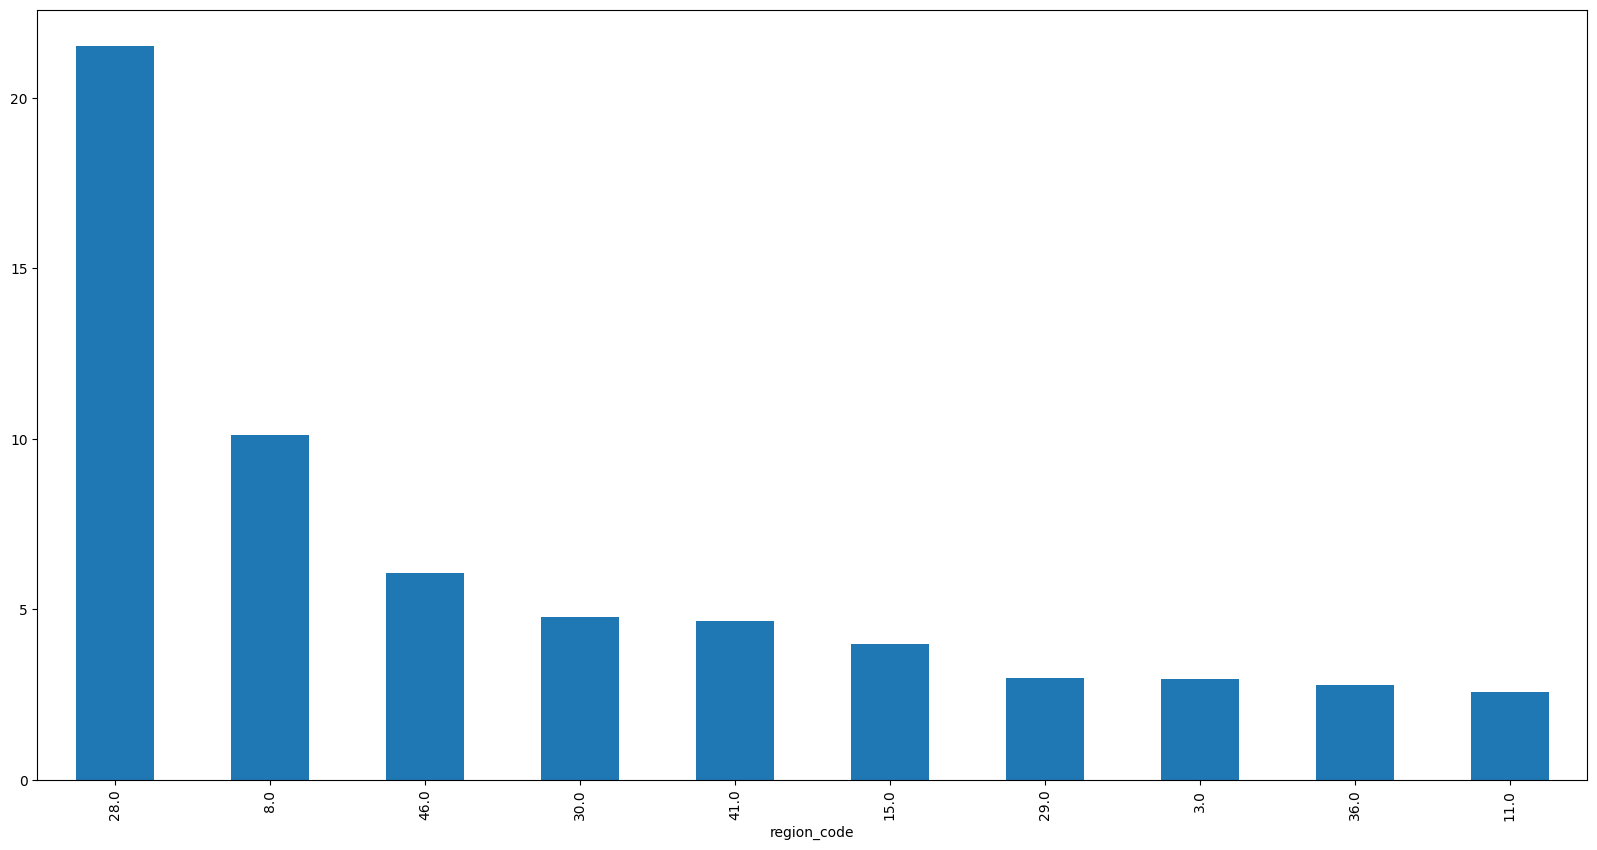

In [12]:
# grafico para la variable region_code
print(df_full['region_code'].value_counts().head(10))
df_full['region_code'].value_counts().sort_values(ascending = False).head(10).apply(lambda x: x/df_full.shape[0]*100).plot(kind='bar', figsize=(20,10))

gender
H   51.24
V   48.76
Name: count, dtype: float64


<Axes: xlabel='gender'>

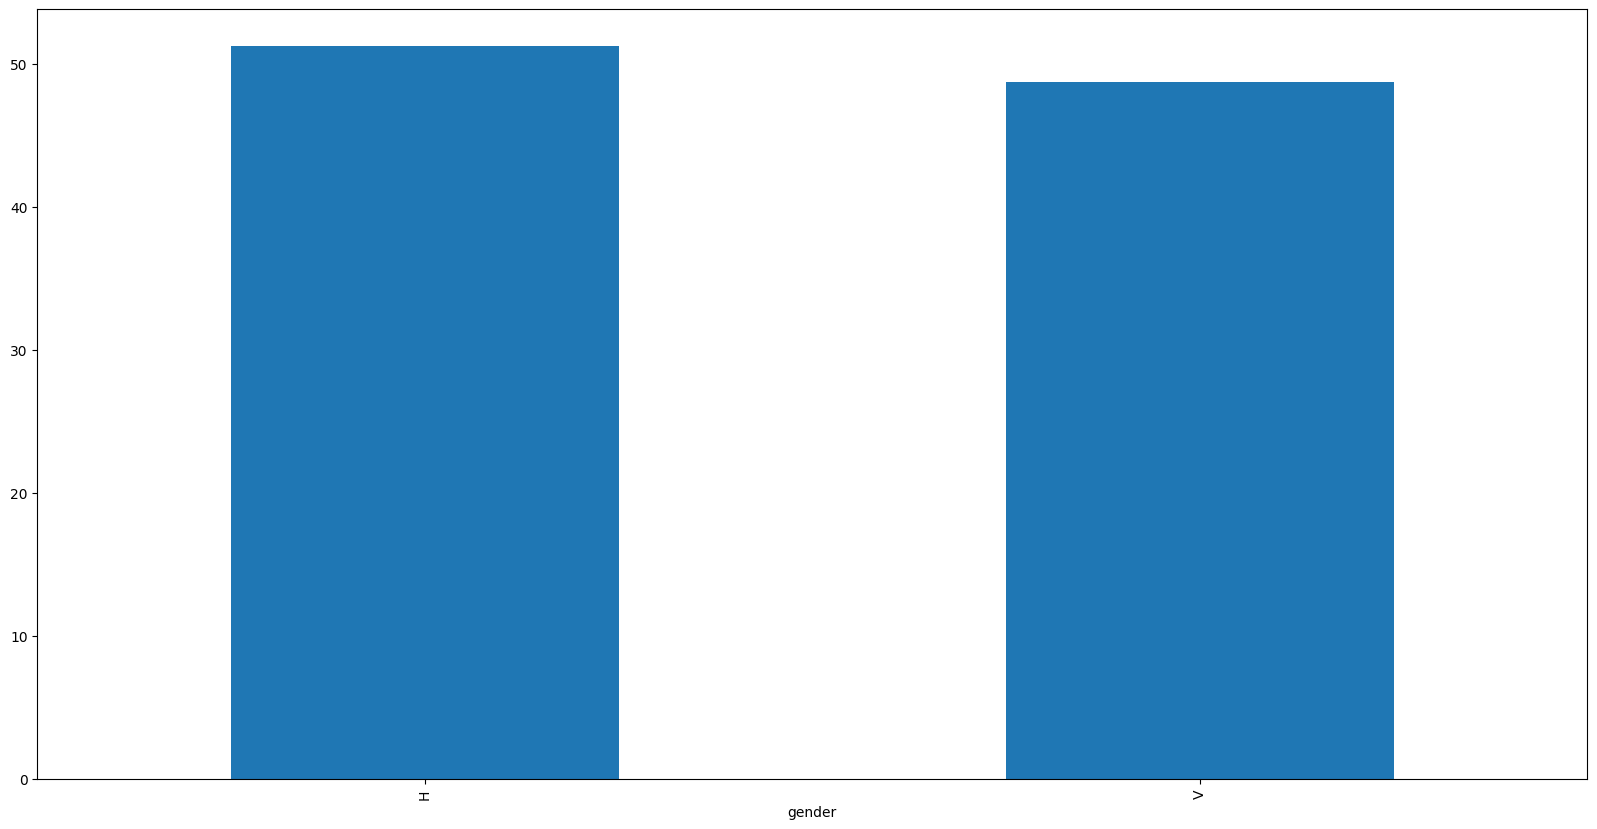

In [13]:
# grafico para la variable gender
print(df_full["gender"].value_counts().apply(lambda x: x/df_full.shape[0]*100))
df_full["gender"].value_counts().apply(lambda x: x/df_full.shape[0]*100).plot(kind='bar', figsize=(20,10))

<Axes: >

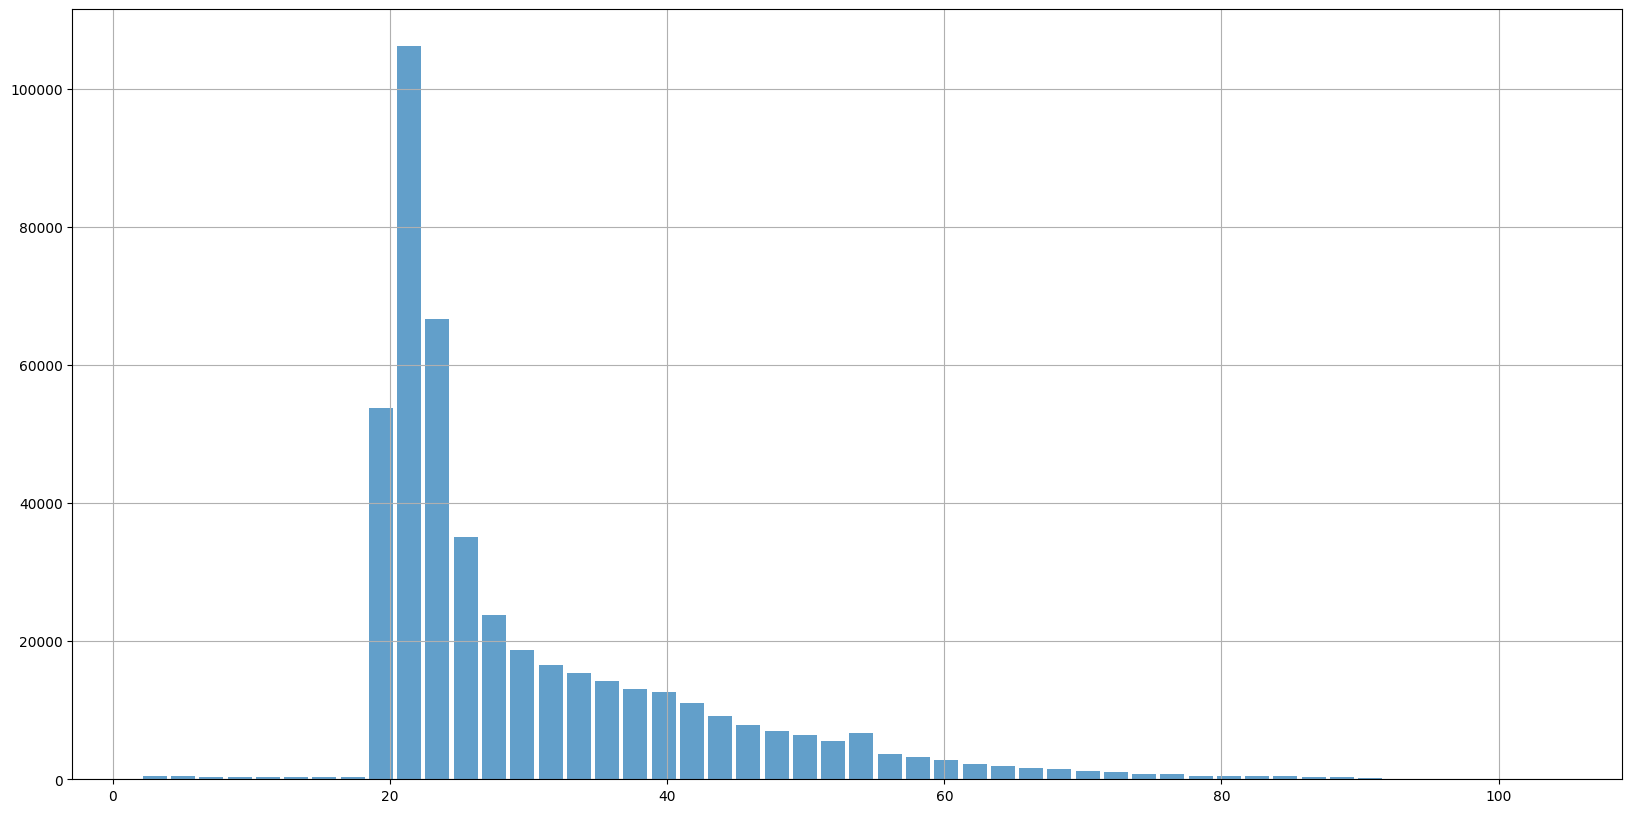

In [14]:
# grafico para la variable age
df_full['age'].hist(bins=50, figsize=(20,10), alpha=0.7, rwidth=0.85)


<Axes: >

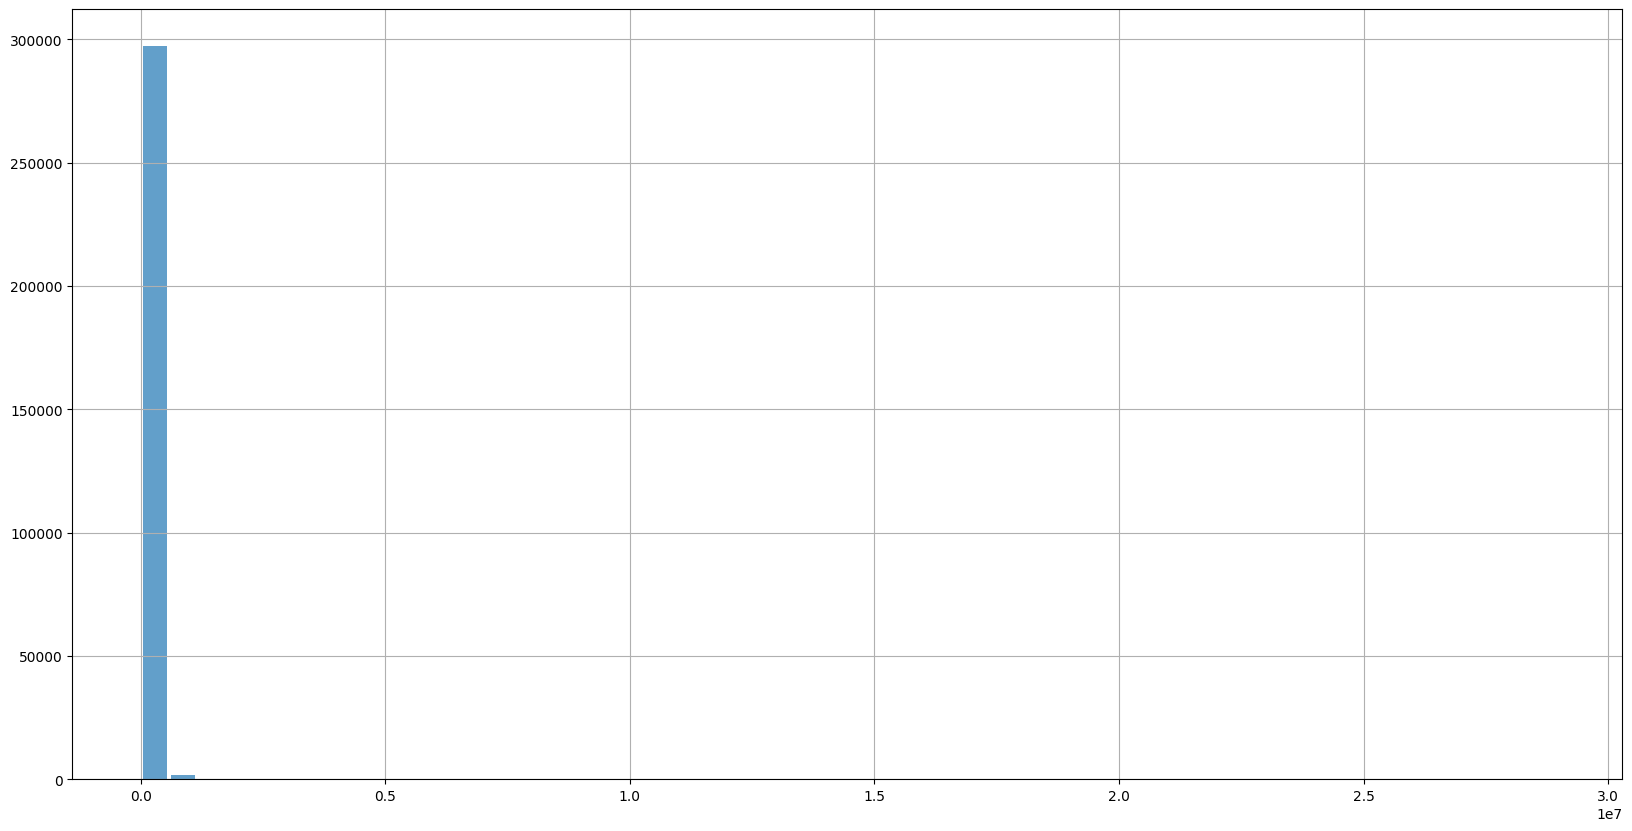

In [15]:
# grafico para la variable age
df_full['salary'].hist(bins=50, figsize=(20,10), alpha=0.7, rwidth=0.85)

deceased
N    456318
S        55
Name: count, dtype: int64


<Axes: xlabel='deceased'>

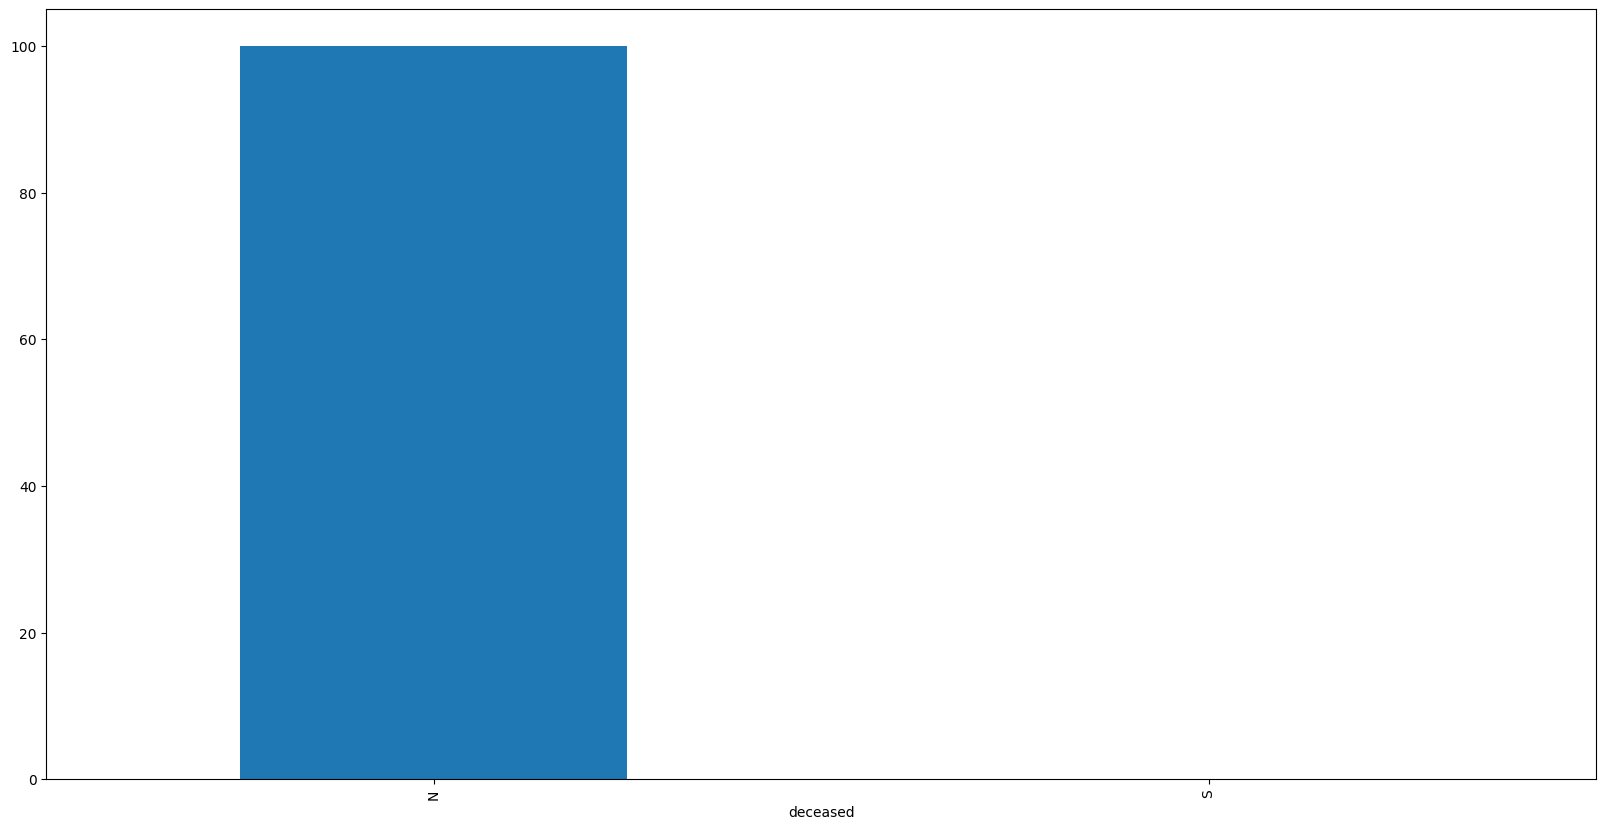

In [16]:
print(df_full["deceased"].value_counts())
df_full["deceased"].value_counts().apply(lambda x: x/df_full.shape[0]*100).plot(kind='bar', figsize=(20,10))

# RELACIONES ENTRE VARIABLES

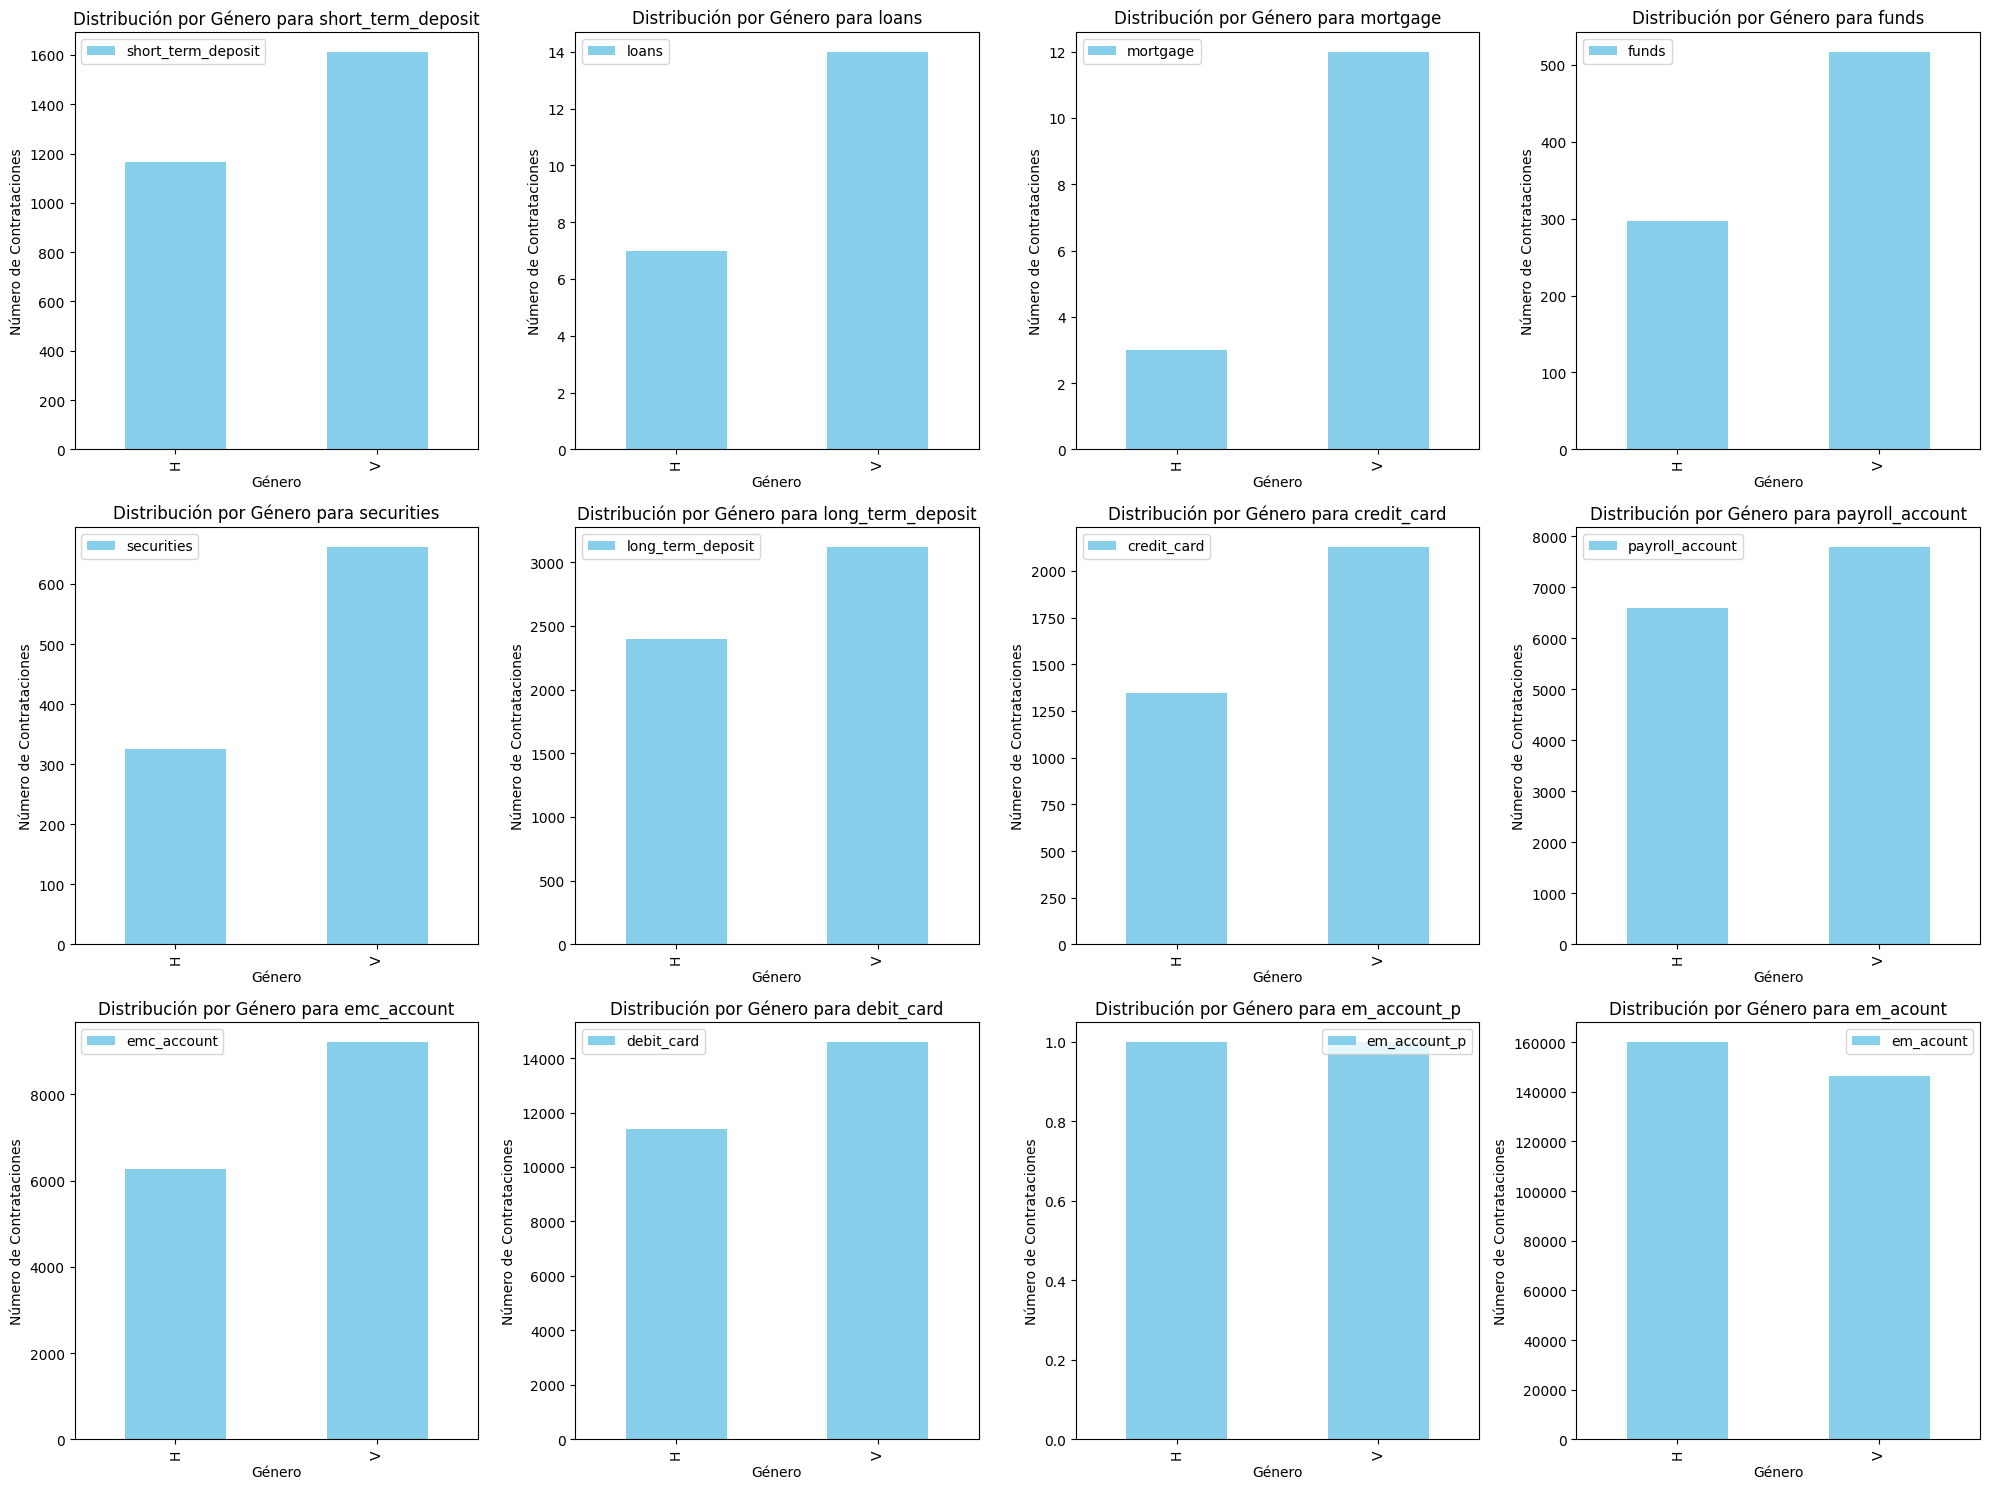

In [23]:

import matplotlib.pyplot as plt

# Lista de productos financieros
financial_products = ['short_term_deposit', 'loans', 'mortgage', 'funds', 
                      'securities', 'long_term_deposit', 'credit_card', 
                      'payroll_account', 'emc_account', 'debit_card',
                      'em_account_p', 'em_acount']

# Crear un DataFrame que agrupe por género y calcule la suma de cada producto financiero
gender_product_distribution = df_full.groupby('gender')[financial_products].sum()

# Configuración de subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 4x4 subplots para acomodar todos los productos
axs = axs.flatten()

# Crear un gráfico de barras para cada producto financiero
for i, product in enumerate(financial_products):
    gender_product_distribution[[product]].plot(kind='bar', stacked=True, ax=axs[i], color=['skyblue', 'lightcoral'])
    axs[i].set_title(f'Distribución por Género para {product}')
    axs[i].set_ylabel('Número de Contrataciones')
    axs[i].set_xlabel('Género')

plt.tight_layout()
plt.show()

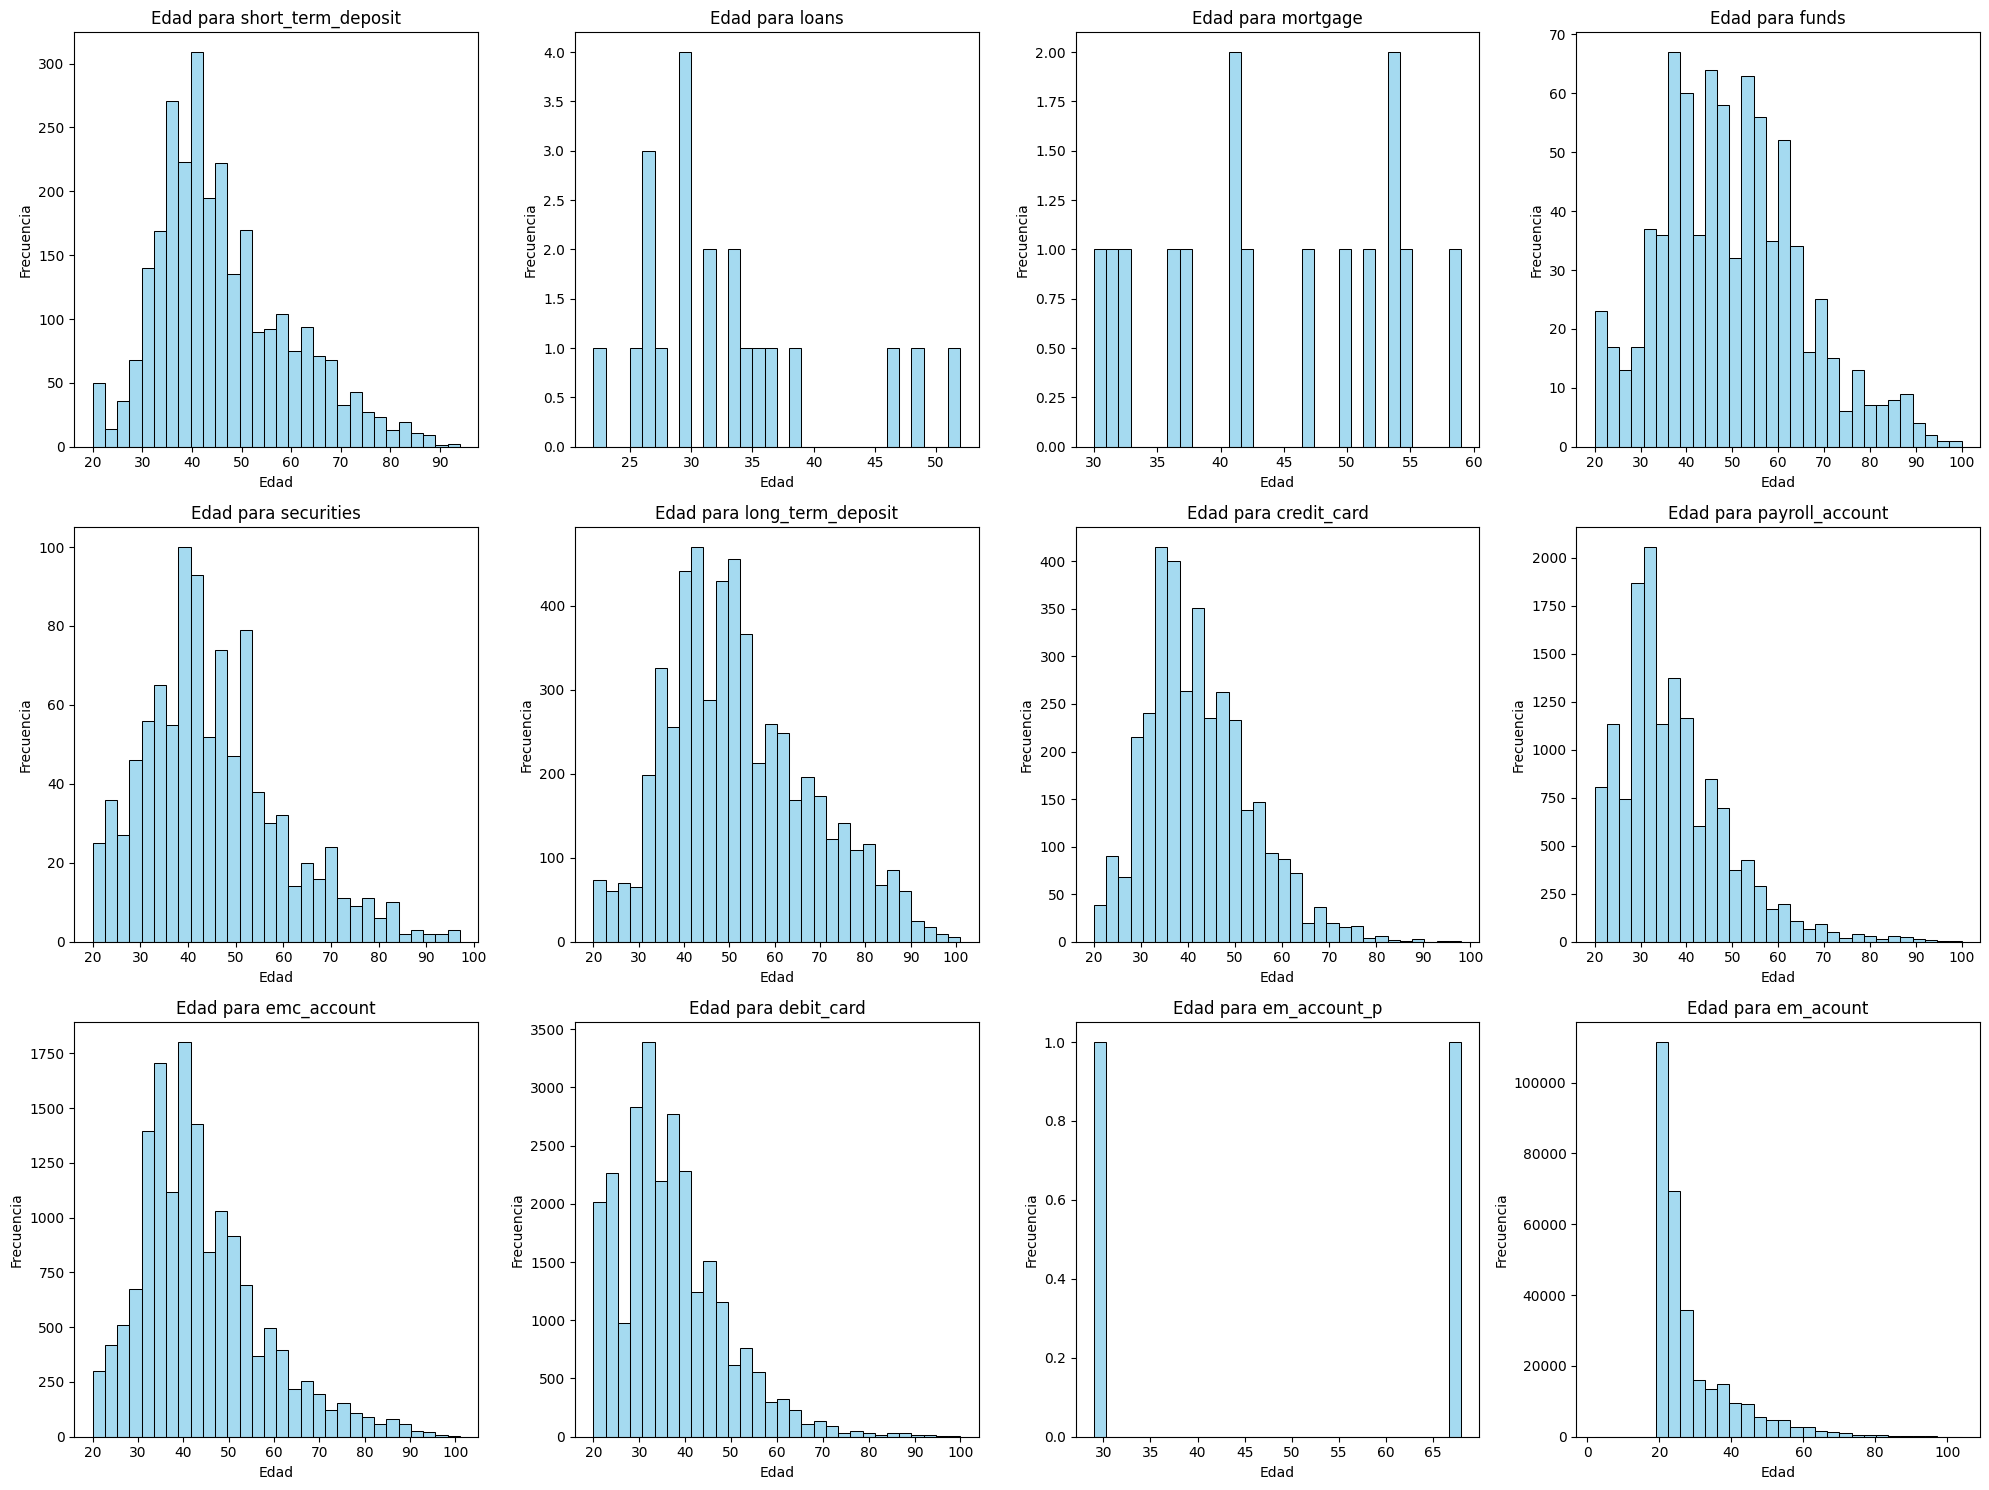

In [25]:
# Configuración de subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 4x4 subplots para acomodar todos los productos
axs = axs.flatten()

# Crear un histograma por cada producto financiero
for i, product in enumerate(financial_products):
    sns.histplot(df_full[df_full[product] == 1]['age'], kde=False, bins=30, color='skyblue', ax=axs[i])
    axs[i].set_title(f'Edad para {product}')
    axs[i].set_xlabel('Edad')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()